In [ ]:
!sudo apt update
!sudo apt-get update
!pip install --upgrade --force-reinstall pandas scipy numpy matplotlib
!pip install cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

!sudo apt-get install texlive-latex-recommended
!sudo apt install texlive-latex-base texlive-latex-extra texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

!pip install matplotlib==3.3.4

import os
os.kill(os.getpid(), 9)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [962 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,230 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,059 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu ja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.7 MB/s eta 0:00:00
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp310-cp310-linux_x86_64.whl size=890024 sha256=f77fbf8f04a0a4bb51ff0e379ddefd5f2a509d4bc692ccaf98a1733f66219967
  Stored in directory: /root/.cache/pip/wheels/07/bd/06/4e979fa263bca266484ee65f5aab8e6b1c9b20f8caa6f2d7da
Successfully built shapely
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 

# Imports

--2023-06-30 17:58:46--  https://dl.freefontsfamily.com/download/Helvetica-Font
Resolving dl.freefontsfamily.com (dl.freefontsfamily.com)... 37.49.229.234
Connecting to dl.freefontsfamily.com (dl.freefontsfamily.com)|37.49.229.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 744473 (727K) [application/zip]
Saving to: ‘Helvetica-Font’

Helvetica-Font      100%[===================>] 727.02K  1.63MB/s    in 0.4s    

2023-06-30 17:58:47 (1.63 MB/s) - ‘Helvetica-Font’ saved [744473/744473]

rm: cannot remove 'LICENSE_OFL.txt': No such file or directory
rm: cannot remove 'README': No such file or directory
rm: cannot remove '*.otf': No such file or directory
Archive:  Helvetica-Font
  inflating: Helvetica.ttf           
  inflating: Helvetica-Oblique.ttf   
  inflating: helvetica-compressed-5871d14b6903a.otf  
  inflating: helvetica-rounded-bold-5871d05ead8de.otf  
  inflating: Helvetica-Bold.ttf      
  inflating: Helvetica-BoldOblique.ttf  
  inflating: helvet

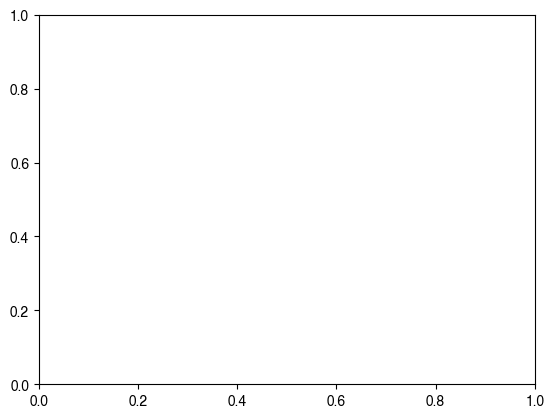

In [ ]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy
import shapely as shp
from shapely import Point
import psutil
import time
import sys
import numpy as np
import networkx as nx
import pandas as pd
import scipy as sp
import scipy.fftpack as fftpack
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import re
from datetime import datetime
from tqdm.notebook import tqdm, trange
import gzip
import os
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as mpatches
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes, mark_inset
from matplotlib import rc
%matplotlib inline



np.set_printoptions(linewidth=250)

font_dir = '/usr/local/lib/python' + str(sys.version_info[0]) + '.' + str(sys.version_info[1]) + '/dist-packages/matplotlib/mpl-data/fonts/ttf/'

# Mount Drive

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

# Set this as the directory in which to save figures
base_dir = '/content/gdrive/My Drive/Amazon Project/'
if not os.path.isdir(base_dir + 'Figures/'):
  os.mkdir(base_dir + 'Figures/')
fig_dir = base_dir + 'Figures/Diffusion/'
if not os.path.isdir(fig_dir):
  os.mkdir(fig_dir)

data_dir = base_dir + 'Data/'
if not os.path.isdir(data_dir):
  os.mkdir(data_dir)

os.chdir(base_dir)

Mounted at /content/gdrive


In [ ]:
!cp Helvetica.ttf $font_dir

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']
plt.xticks(fontname = 'Helvetica')
plt.yticks(fontname = 'Helvetica')
rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{xfrac}')


plt.rcParams['savefig.bbox'] = 'tight'

import matplotlib.font_manager as fm
# fm.FontProperties(fname='/content/gdrive/MyDrive/Helvetica.ttf', size= 24)
fm.fontManager.addfont(font_dir + 'Helvetica.ttf')
# fm.fontManager.addfont(font_dir + 'helvetica.ttf')
# fm.fontManager.ttflist += fm.createFontList(['/content/gdrive/MyDrive/Helvetica.ttf'])
# mpl.rc('font', family='Helvetica')
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']

prop = fm.FontProperties(fname=font_dir+'Helvetica.ttf')
# prop = fm.FontProperties(fname=font_dir+'helvetica.ttf')
font = {'fontname':'Helvetica'}

# Helper Functions

In [ ]:
def haversine(lon1, lat1, lon2, lat2, r=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
#     lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    lon1, lat1, lon2, lat2 = np.radians([lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return c * r

def haversine_np(lon1, lat1, lon2, lat2, r=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    return c * r

def nearest_neighbors(lat,lon,latlon_icos, r=6371, num_neighbors=4, radius=None):
    """
    Find nearest neighbors (using geodesic distance) of given point

    if radius is None, find closest num_neighbors neighbors
    else, find list of neighbors within radius
    """
    lats = np.zeros((len(latlon_icos),)) + lat
    lons = np.zeros((len(latlon_icos),)) + lon
    distances = haversine_np(lons,lats,latlon_icos[:,1],latlon_icos[:,0], r)

    if radius is not None:
        neighbors = []
        for i in range(len(latlon_icos)):
            lat_icos, lon_icos = latlon_icos[i]
            if distances[i] <= radius:
                neighbors.append((i,distances[i]))
        return neighbors
    else:
        neighbors = [(i,distances[i]) for i in range(len(distances))]

        neighbors.sort(key = lambda k: k[1])
        return neighbors[:num_neighbors]

def interpolate_point(lat,lon,latlon_icos,data, r=6371, num_neighbors=4, radius=None):
    """
    Interpolate point using convolution of nearest geodesic neighbors - found either via
    fixed 'num_neighbors' scheme or via all points within 'radius' geodesic distance of input
    """
    neighbors = nearest_neighbors(lat,lon,latlon_icos, r=r,
                                  num_neighbors=num_neighbors, radius=radius)
    return np.sum([(1/dist)*data[i] for (i,dist) in neighbors])/np.sum([(1/dist) for (i,dist) in neighbors])

def interpolate_points(lats,lons,latlon_icos,data, r=6371, num_neighbors=4, radius=None, desc=''):
    """
    Interpolate a sequence of latitude-longitude points given by 'lats' and 'lons' (equal size 1D array)
    using convolution of nearest geodesic neighbors - found either via
    fixed 'num_neighbors' scheme or via all points within 'radius' geodesic distance of input
    """
    results = np.zeros((len(lats),))
    for i in trange(len(lats), desc=desc, leave=False):
        lat, lon = lats[i], lons[i]
        results[i] = interpolate_point(lat,lon,latlon_icos,data, r=r,
                                       num_neighbors=num_neighbors,
                                       radius=radius)
    return results

def replace_points_near_poles(ilat, ilon, idat, latlon_icos, data,
                              threshold=15, num_neighbors=4, radius=None):
    """
    To fix artifacting near poles, manually interpolate with nearest neighbors

    ilon, ilat is meshgrid over globe
    idat is associated interpolation of data
    data is list of some value for each node in latlon_icos

    90-threshold and -90+threshold (in degrees) are latidues to replace

    """
    close_to_poles = np.concatenate((np.where(abs(ilat[:,0]-90) < threshold)[0],
                                     np.where(abs(ilat[:,0]+90) < threshold)[0]))

    lons = [lon for i in range(len(close_to_poles)) for lon in ilon[0,:]]
    lats = [ilat[lat,0] for lat in close_to_poles for i in range(len(ilon[0,:]))]

    results_close_to_poles = interpolate_points(lats,lons,latlon_icos,data,
                                                num_neighbors=num_neighbors,
                                                radius=radius,
                                                desc = 'Replacing Poles')

    nj = len(ilon[0,:])
    for i in range(len(close_to_poles)):
        lat_ind = close_to_poles[i]
        for j in range(nj):
            idat[lat_ind,j] = results_close_to_poles[nj*i + j]

    return idat

def replace_points_near_dateline(ilat, ilon, idat, latlon_icos, data,
                                 threshold=5, num_neighbors=4, radius=None):
    """
    To fix artifacting near dateline, manually interpolate with longitude periodicity from 0 to 360

    ilon, ilat is meshgrid over globe
    idat is associated interpolation of data
    data is list of some value for each node in latlon_icos

    +/- threshold (in degrees) are longitudes to replace

    """
    close_to_dateline = np.concatenate((np.where(abs(ilon[0,:]) < threshold)[0],
                                        np.where(abs(ilon[0,:]-360) < threshold)[0]))

    lons = [ilon[0,lon] for lon in close_to_dateline for i in range(len(ilat[:,0]))]
    lats = [lat for i in range(len(close_to_dateline)) for lat in ilat[:,0]]

    results_close_to_dateline = interpolate_points(lats,lons,latlon_icos,data,
                                                   num_neighbors=num_neighbors,
                                                   radius=radius,
                                                   desc = 'Replacing Dateline')

    nj = len(ilat[:,0])
    for i in range(len(close_to_dateline)):
        lon_ind = close_to_dateline[i]
        for j in range(nj):
            idat[j,lon_ind] = results_close_to_dateline[nj*i + j]

    return idat

def replace_points_where_nan(ilat, ilon, idat, latlon_icos, data, num_neighbors=4, radius=None):
    """
    Use custom interpolation (using nearest geodesic neighbors) for points that are np.nan

    Can be used to simply fill in values mixed in scipy griddata interpolation due to longitude
    or latitude outside input icosahedral range.

    However, it is not guaranteed that this will fix the seam at the dateline - values with longtidue
    slightly larger than 0 may not smoothly vary since usually the scipy griddata interpolation misses
    data just to the *WEST* of the dateline. Therefore even if those missing values are replaced, there
    may be a seam across the dateline (longutude 0 degrees). TO FIX THIS, SIMPLY USE THE
    replace_points_near_dateline FUNCTION TO INTERPOLATE DATA TO THE WEST *AND* EAST OF THE DATELINE.
    """
    where = np.where(np.isnan(idat))

    lats = ilat[where[0],0]
    lons = ilon[0,where[1]]

    results_where_nans = interpolate_points(lats,lons,latlon_icos,data,
                                            num_neighbors=num_neighbors,
                                            radius=radius,
                                            desc = 'Replacing NaNs')

    for i in range(len(lats)):
        lat_ind = where[0][i]
        lon_ind = where[1][i]

        idat[lat_ind,lon_ind] = results_where_nans[i]

    return idat

def replace_points_in_shapefile(shape_filename, ilat, ilon, idat, fill_value=np.nan, inside=True):
    """
    This function can read a shapefile and fill values from the interpolated grid with 'fill_value'
    when they fall inside of the shapefile. This is useful since the interpolation of scatter data will
    fill in all values - even those that are intentionally left blank.

    OPTIONALLY: Specify inside=False to reverse which points are excluded - here the points *OUTSIDE*
    the shapefile are filled with 'fill_value'.

    TODO: Check if shapefiles with multiple polygons will break function - it was only tested with a
    contiguous-polygon shapefile.
    """
    from shapely.ops import unary_union
    import shapely.vectorized

    reader = shpreader.Reader(shape_filename)

    shape_geom = unary_union(list(reader.geometries()))

    shape_mask = shapely.vectorized.contains(shape_geom, ilon, ilat)
    shape_mask = np.logical_or(shape_mask,
                   shapely.vectorized.contains(shape_geom, ilon-360, ilat))

    idat[np.where(shape_mask == inside)] = fill_value

    return idat

def interpolate_scatter_data(latlon_icos, data, method='linear',
                             threshold_dateline=5, threshold_poles=15,
                             replace_nans = True,
                             num_neighbors=4, radius=None,
                             extent=[0, 360, -90, 90], filler=0,
                             num_interp_pts=200, shape_filename=None,
                             fill_value=np.nan):
    """
    This function takes scatter data as input - with (presumably icosahedral) coordinates 'latlon_icos',
    which is an (N,2)-size list of latitude-longitude pairs, and length-N 'data' specifying the pertinent
    qualitative information for each latitude-longitude pair.

    The output of the function is interpolated grid data intended for use in a contourf plot, consiting of
    'ilon' longitudinal grid - (num_interp_pts,num_interp_pts)
    'ilat' latitudinal grid - (num_interp_pts,num_interp_pts)
    'idat' grid data - (num_interp_pts,num_interp_pts)

    The basic interpolation is performed with scipy.interpolate.griddata, which currently has the flaw of
    not extrapolating under a method='linear' interpolation scheme. It also currently has no way to make
    use of the periodicity over the dateline (longitude = 0 degrees).

    In order to fix the missing points left by scipy.interpolate.griddata, three methods were developed:
    1) Replace points within some degree longitude of the dateline
    2) Replace points within some degree of the poles
    3) Replace all points filled with np.nan
    All three methods utilize a nearest-neighbor convolution, where points with low geodesic distance to
    the grid point are put under a weighted average to fill the grid data. See the function
    interpolate_points for details.

    Lastly, optionally fill values that fall inside (or outside) a supplied shapefile with given 'fill_value'.
    """
    from scipy.interpolate import griddata

    ilon = np.linspace(extent[0]-filler, extent[1]+filler, num_interp_pts)
    ilat = np.linspace(extent[2]-filler, extent[3]+filler, num_interp_pts)
    ilon, ilat = np.meshgrid(ilon, ilat)
    idat = griddata((latlon_icos[:,1], latlon_icos[:,0]), data,
                    (ilon, ilat), method=method)

    if threshold_dateline > 0:
        idat = replace_points_near_dateline(ilat, ilon, idat, latlon_icos,
                                            data, threshold=threshold_dateline,
                                            num_neighbors=num_neighbors,
                                            radius=radius)
    if threshold_poles > 0:
        idat = replace_points_near_poles(ilat, ilon, idat, latlon_icos,
                                         data, threshold=threshold_poles,
                                         num_neighbors=num_neighbors,
                                         radius=radius)
    if replace_nans:
        idat = replace_points_where_nan(ilat, ilon, idat, latlon_icos, data,
                                        num_neighbors=num_neighbors,
                                        radius=radius)

    if shape_filename is not None:
        idat = replace_points_in_shapefile(shape_filename, ilat, ilon,
                                           idat, fill_value=fill_value)

    return ilat, ilon, idat

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False),
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = mpl.colors.LinearSegmentedColormap(name, cdict)
    try:
        # mpl.cm.unregister_cmap(name)
        mpl.colormaps.unregister(name)
    except:
        pass
    # plt.register_cmap(cmap=newcmap)
    # mpl.colormaps.register(cmap=newcmap)

    return newcmap

def yy_to_yyyy(yy):
    """
    Convert string of year in yy format to string in yyyy format
    """
    yy_int = int(yy)
    if yy_int < 10:
        return '200' + str(yy_int)
    elif yy_int < 48:
        return '20' + str(yy_int)
    else:
        return '19' + str(yy_int)


def start_year_to_date_range(start_year,year_interval=25):
    """
    Convert string of start year in yy format to date range string in yyyy-yyyy format
    """
    start = yy_to_yyyy(start_year)
    end = str(int(start) + year_interval)
    return start + '-' + end

def match_nodes(dates,finallons_dict,finallats_dict):
    f = gzip.open(data_dir + '/G/'+dates[0]+'.data','rb')
    G = pkl.load(f)
    f.close()
    N = G.number_of_nodes()

    node_matches = np.zeros((N,len(dates)))
    for node in G.nodes():
        node_matches[node,0] = node

    for i in trange(1,len(dates),desc='Matching'):
        for j in range(N):
            node_matches[j,i] = np.where(np.logical_and(finallons_dict[dates[i]] == finallons_dict[dates[0]][j],
                                   finallats_dict[dates[i]] == finallats_dict[dates[0]][j]))[0][0]

    return node_matches.astype(int)

def get_trend(trend_dict,dates,finallons_dict,finallats_dict,normalize=False):
    f = gzip.open(data_dir + '/G/'+dates[0]+'.data','rb')
    G = pkl.load(f)
    f.close()
    nodes = list(G.nodes())

    node_matches = match_nodes(dates,finallons_dict,finallats_dict)

    trend = np.zeros((len(nodes),1))

    for node in nodes:
#         slope, _ = np.polyfit(list(range(48)), [trend_dict[date][node,1] for date in dates], 1)
        slope, _ = np.polyfit(list(range(48)), [trend_dict[dates[i]][node_matches[node,i]] for i in range(len(dates))], 1)
        trend[node] = slope

    if normalize:
#         return np.interp(trend, (trend.min(), trend.max()), (-1, +1))
        return trend/abs(min(trend))
    else:
        return trend

# Diffusion

In [ ]:
with gzip.open(data_dir + 'icosahedral_grid.data', 'rb') as file:
  latlon_icos = np.array(pkl.load(file))

months = 300
offset = 365.25

num_nodes = 10242

with gzip.open(data_dir + 'year_intervals-months='+str(months)+',offset='+str(offset) + '.data', 'rb') as file:
  year_intervals = pkl.load(file)

with gzip.open(data_dir + 'date_intervals-months='+str(months)+',offset='+str(offset) + '.data', 'rb') as file:
  date_intervals = pkl.load(file)

dates = [year_intervals[i][0] + '-' + year_intervals[i][1] for i in range(len(year_intervals))]
print(dates)

reader = shpreader.Reader(base_dir+'Amazon Biome/amazonia.shp')
amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())

recompute = False

if recompute:
  amazon_nodes = []

  for i in range(num_nodes):
    if amazon._geoms[0].contains(Point(latlon_icos[i,1]-360,latlon_icos[i,0])):
      amazon_nodes.append(i)

  with gzip.open(data_dir + 'amazon_nodes_new_networks.data', 'wb') as file:
    pkl.dump(amazon_nodes, file)
else:
  with gzip.open(data_dir + 'amazon_nodes_new_networks.data', 'rb') as file:
    amazon_nodes = pkl.load(file)

['1948-1973', '1949-1974', '1950-1975', '1951-1976', '1952-1977', '1953-1978', '1954-1979', '1955-1980', '1956-1981', '1957-1982', '1958-1983', '1959-1984', '1960-1985', '1961-1986', '1962-1987', '1963-1988', '1964-1989', '1965-1990', '1966-1991', '1967-1992', '1968-1993', '1969-1994', '1970-1995', '1971-1996', '1972-1997', '1973-1998', '1974-1999', '1975-2000', '1976-2001', '1977-2002', '1978-2003', '1979-2004', '1980-2005', '1981-2006', '1982-2007', '1983-2008', '1984-2009', '1985-2010', '1986-2011', '1987-2012', '1988-2013', '1989-2014', '1990-2015', '1991-2016', '1992-2017', '1993-2018', '1994-2019', '1995-2020', '1996-2021', '1997-2022', '1998-2023']


In [ ]:
ks = [50, 100, 250, 500, 1000]
densities = [0.005, 0.01, 0.025, 0.05, 0.1]


diff_dir = data_dir + 'Diffusion/'
if not os.path.isdir(diff_dir):
  os.mkdir(diff_dir)

t = np.linspace(0,0.05,200)

recompute = False
if recompute:
  average_phi_dict = {}
  num_nodes_affected_dict = {}
  diff_dist_dict = {}
  diff_dist_trend_dict = {}



  for k in ks:
    dir_end = dir_end = '-months={:},offset={:},k={:}/'.format(months,offset,k)

    with gzip.open(diff_dir + 'phi_dict'+dir_end[:-1]+'.data', 'rb') as file:
      phi_dict = pkl.load(file)

    non_amazon_nodes = np.array(list(set(range(num_nodes)) - set(amazon_nodes)))

    average_phi_dict[k] = {date:None for date in dates}
    for date in dates:
      average_phi_dict[k][date] = np.mean(phi_dict[date][non_amazon_nodes,:],axis=0)


    num_nodes_affected_dict[k] = {date:None for date in dates}
    for date in tqdm(dates, desc='k = {:}, # Nodes Affected'.format(k), leave=False):
      threshold = len(amazon_nodes)/num_nodes
      num_nodes_affected_dict[k][date] = np.array([len(np.where(phi_dict[date][non_amazon_nodes,i] >= threshold)[0]) for i in range(200)])/len(non_amazon_nodes)

    diff_dist_dict[k] = {date:None for date in dates}
    for date in tqdm(dates, desc='k = {:}, Diff Dist'.format(k), leave=False):
      phi = phi_dict[date]
      N = len(phi)
      len_t = phi.shape[1]
      diff_dist = np.zeros((N,len_t))
      for j in range(len_t):
        diff_dist[:,j] = np.mean(np.abs(phi[:,j].reshape((N,1))-phi[amazon_nodes,j]), axis=1)
      diff_dist_dict[k][date] = diff_dist


    diff_dist_trend_dict[k] = np.zeros((num_nodes,len(t)))
    for i in trange(len(t), desc='k = {:}, Diff Dist Trend'.format(k), leave=False):
      for node in range(num_nodes):
          slope, _ = np.polyfit(list(range(len(dates))), [diff_dist_dict[k][date][node,i] for date in dates], 1)
          diff_dist_trend_dict[k][node,i] = slope

    i_max_change = np.argmax(np.percentile(diff_dist_trend_dict[k],0.75,axis=0)-np.percentile(diff_dist_trend_dict[k],0.25,axis=0)) # max interquartile range
    print(k, t[i_max_change])


  for density in densities:
    dir_end = dir_end = '-months={:},offset={:},density={:}/'.format(months,offset,density)

    with gzip.open(diff_dir + 'phi_dict'+dir_end[:-1]+'.data', 'rb') as file:
      phi_dict = pkl.load(file)

    non_amazon_nodes = np.array(list(set(range(num_nodes)) - set(amazon_nodes)))

    average_phi_dict[density] = {date:None for date in dates}
    for date in dates:
      average_phi_dict[density][date] = np.mean(phi_dict[date][non_amazon_nodes,:],axis=0)


    num_nodes_affected_dict[density] = {date:None for date in dates}
    for date in tqdm(dates, desc='density = {:}, # Nodes Affected'.format(density), leave=False):
      threshold = len(amazon_nodes)/num_nodes
      num_nodes_affected_dict[density][date] = np.array([len(np.where(phi_dict[date][non_amazon_nodes,i] >= threshold)[0]) for i in range(200)])/len(non_amazon_nodes)

    diff_dist_dict[density] = {date:None for date in dates}
    for date in tqdm(dates, desc='density = {:}, Diff Dist'.format(density), leave=False):
      phi = phi_dict[date]
      N = len(phi)
      len_t = phi.shape[1]
      diff_dist = np.zeros((N,len_t))
      for j in range(len_t):
        diff_dist[:,j] = np.mean(np.abs(phi[:,j].reshape((N,1))-phi[amazon_nodes,j]), axis=1)
      diff_dist_dict[density][date] = diff_dist


    diff_dist_trend_dict[density] = np.zeros((num_nodes,len(t)))
    for i in trange(len(t), desc='density = {:}, Diff Dist Trend'.format(density), leave=False):
      for node in range(num_nodes):
          slope, _ = np.polyfit(list(range(len(dates))), [diff_dist_dict[density][date][node,i] for date in dates], 1)
          diff_dist_trend_dict[density][node,i] = slope

    i_max_change = np.argmax(np.percentile(diff_dist_trend_dict[density],0.75,axis=0)-np.percentile(diff_dist_trend_dict[density],0.25,axis=0)) # max interquartile range
    print(density, t[i_max_change])

  with gzip.open(diff_dir + 'processed_results.data', 'wb') as file:
    pkl.dump(average_phi_dict, file)
    pkl.dump(num_nodes_affected_dict, file)
    pkl.dump(diff_dist_dict, file)
    pkl.dump(diff_dist_trend_dict, file)
else:
  with gzip.open(diff_dir + 'processed_results.data', 'rb') as file:
    average_phi_dict = pkl.load(file)
    num_nodes_affected_dict = pkl.load(file)
    diff_dist_dict = pkl.load(file)
    diff_dist_trend_dict = pkl.load(file)

In [ ]:
ks = [50, 100, 250, 500, 1000]

class MagnitudeFormatter(mpl.ticker.ScalarFormatter):
    def __init__(self, exponent=None):
        super().__init__()
        self._fixed_exponent = exponent

    def _set_order_of_magnitude(self):
        if self._fixed_exponent:
            self.orderOfMagnitude = self._fixed_exponent
        else:
            super()._set_order_of_magnitude()

for k in ks:
  threshold = 0.95
  crossing = 0
  for date in dates:
    crossing = max(crossing, np.argmax(average_phi_dict[k][date]>threshold), np.argmax(num_nodes_affected_dict[k][date]>threshold))
  if crossing == 0:
    xlim_max = t[-1]
  else:
    xlim_max = t[crossing]


  dir_end = dir_end = '-months={:},offset={:},k={:}/'.format(months,offset,k)

  i_max_change = np.argmax(np.quantile(diff_dist_trend_dict[k],0.75,axis=0)-np.quantile(diff_dist_trend_dict[k],0.25,axis=0)) # max interquartile range

  t_target = t[i_max_change]
  i_ind = i_max_change

  xlim_max = min(t[-1],max(xlim_max,1.1*t_target))


  ilat, ilon, idat = interpolate_scatter_data(latlon_icos, list(diff_dist_trend_dict[k][:,i_ind]),
#                      shape_filename=base_dir+'/Amazon Biome/amazonia.shp',
                    method='linear', num_interp_pts=200, threshold_dateline=5, threshold_poles=15)


  fontsize = 36

  plt.rc('text', usetex=True)
  plt.rc('xtick',labelsize=fontsize)
  plt.rc('ytick',labelsize=fontsize)

  lw = 3

  fig, axs = plt.subplots(2,3,sharex=True,figsize=(40,10),gridspec_kw={'width_ratios':[1,0.05,1]})
  ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
  ax2 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), sharex=ax1)
  cax1 = plt.subplot2grid(shape=(2,3), loc=(0, 1), rowspan=2)
  ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=1, projection=ccrs.Robinson(central_longitude=180))
  cax2 = plt.subplot2grid(shape=(2,3), loc=(1, 2))

  n = len(dates)
  c = np.arange(1,n+1)
  norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
  cmap = mpl.cm.ScalarMappable(norm=norm, cmap='cividis')
  cmap.set_array([])
  for i in range(len(dates)):
      date = dates[i]
      ax1.plot(t,average_phi_dict[k][date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=5)

  plt.setp(ax1.get_xticklabels(), visible=False)

  # ax12.set_xlabel('$t$',fontsize=fontsize)
  ax1.set_ylabel(r'$\langle \phi_{i\notin U}(t) \rangle$',fontsize=fontsize, labelpad=12)

  ax1.set_xlim([0, xlim_max])
  ax1.set_ylim([0, 1])
  # ax1.set_yticks([0.015, 0.016, 0.017, 0.018])

  xticks = ax1.get_xticks()
  ax1.set_xticks(xticks)
  ax1.set_xticklabels(xticks, fontsize=fontsize)
  yticks = ax1.get_yticks()
  ax1.set_yticks(yticks)
  ax1.set_yticklabels(yticks, fontsize=fontsize)



  ax1.plot([t_target, t_target], ax1.get_ylim(), '--', c='gray', lw=lw, zorder=4)

  spacing = 0.025
  ax1.annotate(r'\textbf{(a)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

  ax1.tick_params(length=15,width=3)
  plt.setp(ax1.spines.values(), linewidth=3, zorder=10)

  ### AXIS 2, NUMBER OF AFFECTED NODES
  ax2.tick_params(bottom=True, top=True, left=True, right=False)
  for i in range(len(dates)):
      date = dates[i]
      ax2.plot(t,num_nodes_affected_dict[k][date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=5)


  ax2.set_xlabel('$t$',fontsize=fontsize)
  # ax2.set_ylabel(r'$N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}/N_{NA}$',fontsize=fontsize,
  #                labelpad=10)
  # ax2.set_ylabel(r'$\sfrac{N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}}{N_{NA}}$',fontsize=fontsize+10,
  #                labelpad=10)
  ax2.set_ylabel(r'$\sfrac{|\phi_{i\notin U}(t) \geq \sfrac{|U|}{N}|}{|U^{\mathsf{c}}|}$',fontsize=fontsize+10,
                labelpad=10)

  # ax2.set_xlim([0,t[-1]])
  ax2.set_xlim([0, xlim_max])
  ax2.set_ylim([0,1])
  # ax2.set_yticks([0.2,0.4,0.6])

  xticks = ax2.get_xticks()
  ax2.set_xticks(xticks)
  ax2.set_xticklabels(xticks, fontsize=fontsize)
  yticks = ax2.get_yticks()
  ax2.set_yticks(yticks)
  ax2.set_yticklabels(yticks, fontsize=fontsize)

  ax2.plot([t_target, t_target], ax2.get_ylim(), '--', c='gray', lw=lw, zorder=4)
  if t_target >= 0.9*xlim_max:
    ax1.annotate(r'$t = {:.4f}$'.format(t_target), color='k', xy=(t_target-0.01*xlim_max, .05), xycoords='data',
    #              bbox=dict(facecolor='r',boxstyle='round',alpha=0.25),
                fontsize=fontsize,usetex=True, va='bottom', ha='right',zorder=6)
  else:
    ax1.annotate(r'$t = {:.4f}$'.format(t_target), color='k', xy=(t_target+0.01*xlim_max, .05), xycoords='data',
    #              bbox=dict(facecolor='r',boxstyle='round',alpha=0.25),
                fontsize=fontsize,usetex=True, va='bottom', ha='left',zorder=6)

  # pos_ax1 = ax1.get_position()
  # pos_ax2 = ax2.get_position()
  # points_ax1 = pos_ax1.get_points()
  # points_ax2 = pos_ax2.get_points()

  # spacing = 0.005
  # # width = points_ax1[1][0] - points_ax1[0][0]
  # width = 0.4
  # points_ax1[0][0] = 0
  # points_ax1[1][0] = width
  # points_ax2[0][0] = 0
  # points_ax2[1][0] = width

  # pos_ax1.set_points(points_ax1)
  # pos_ax2.set_points(points_ax2)
  # ax1.set_position(pos_ax1)
  # ax2.set_position(pos_ax2)


  # pos_ax1 = ax1.get_position()
  # pos_cax1 = cax1.get_position()

  # points_ax1 = pos_ax1.get_points()
  # points_cax1 = pos_cax1.get_points()

  # spacing = 0.005
  # # width = points_cax1[1][0] - points_cax1[0][0]
  # width = 0.025
  # points_cax1[0][0] = points_ax1[1][0] + spacing
  # points_cax1[1][0] = points_cax1[0][0] + width

  # pos_cax1.set_points(points_cax1)

  # cax1.set_position(pos_cax1)

  spacing = 0.025
  ax2.annotate(r'\textbf{(b)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

  ax2.tick_params(length=15,width=3)
  plt.setp(ax2.spines.values(), linewidth=3, zorder=10)



  num_ticks = 5
  ticks = np.linspace(0,len(dates)-1,num_ticks).astype(int)

  # cax1 = fig.add_ax1es([0.68, 0.21, 0.01, 0.755])
  cbar1 = fig.colorbar(cmap, ticks=ticks,
                      cax=cax1, orientation='vertical', pad=-1, aspect=15, boundaries=np.arange(-.5,len(c),1))
  # cbar1.set_label(r'',fontsize=fontsize,rotation='vertical',labelpad=20)
  cbar1.ax.set_yticklabels([dates[tick] for tick in ticks])
  cbar1.ax.tick_params(length=15,width=3)
  cbar1.outline.set_linewidth(3)

  pos_ax1 = ax1.get_position()
  pos_ax2 = ax2.get_position()
  points_ax1 = pos_ax1.get_points()
  points_ax2 = pos_ax2.get_points()

  spacing = 0.005
  # width = points_ax1[1][0] - points_ax1[0][0]
  width = 0.4
  points_ax1[0][0] = 0
  points_ax1[1][0] = width
  points_ax2[0][0] = 0
  points_ax2[1][0] = width

  pos_ax1.set_points(points_ax1)
  pos_ax2.set_points(points_ax2)
  ax1.set_position(pos_ax1)
  ax2.set_position(pos_ax2)


  pos_ax1 = ax1.get_position()
  pos_cax1 = cax1.get_position()

  points_ax1 = pos_ax1.get_points()
  points_cax1 = pos_cax1.get_points()

  spacing = 0.005
  # width = points_cax1[1][0] - points_cax1[0][0]
  width = 0.025
  points_cax1[0][0] = points_ax1[1][0] + spacing
  points_cax1[1][0] = points_cax1[0][0] + width

  pos_cax1.set_points(points_cax1)

  cax1.set_position(pos_cax1)








  ax3.coastlines(zorder=5)


  # min_value = np.nanmin(idat)
  # max_value = np.nanmax(idat)
  # min_value = min(np.delete(dist_trend,amazon_nodes_corrected))
  # max_value = max(np.delete(dist_trend,amazon_nodes_corrected))
  # min_value = -.02#min(R_i_trend)
  # max_value = .02#max(R_i_trend)

  # idat1 = idat
  # idat1[np.where(idat < min_value)] = min_value

  # max_value = max(abs(np.min(diff_dist_trend_dict[k][:,i_ind])),np.max(diff_dist_trend_dict[k][:,i_ind]))
  # min_value = -max_value

  # min_value = np.min(diff_dist_trend_dict[k][:,i_ind])
  # max_value = np.max(diff_dist_trend_dict[k][:,i_ind])

  min_value = np.quantile(diff_dist_trend_dict[k][:,i_ind], 0.005)
  max_value = np.quantile(diff_dist_trend_dict[k][:,i_ind], 0.995)

  levels = np.linspace(min_value,max_value,100)
  ticks = [(levels[i]+levels[i+1])/2 for i in range(len(levels)-1)]

  # midpoint = -min_value/(max_value-min_value)
  cmap = mpl.cm.PuOr_r
  cmap = shiftedColorMap(cmap, start=0, midpoint=-min_value/(max_value-min_value), stop=1.0, name='shiftedcmap')
  # shifted_cmap = shiftedColorMap(cmap, midpoint=midpoint)


  reader = shpreader.Reader(base_dir+'/Amazon Biome/amazonia.shp')
  amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())
  ax3.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)

  plt.setp(ax3.spines.values(), linewidth=3, zorder=10)


  # im = ax3.scatter(latlon_icos[:,1], latlon_icos[:,0],
  #                   c=diff_dist_trend_dict[k][:,i_ind],
  #                   cmap='bwr', transform=ccrs.PlateCarree(), marker='o', s=20,
  #                   edgecolors=None)
  im = ax3.contourf(ilon, ilat, idat, levels=levels,
                  cmap=cmap, alpha=1, extend='both',
                  vmin=min_value, vmax=max_value,
                  transform=ccrs.PlateCarree(), zorder=4)
  for c in im.collections:
    c.set_edgecolor("face")
  im.set_clim(min_value, max_value)
  cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
  # ticks = np.array([-5,-4,-3,-2,-1,0,1,2])
  # cbar2.set_ticks(ticks*1e-5)
  # cbar2.set_ticklabels(ticks)

  # cbar2=plt.colorbar(im, ax=ax3, ticks=ticks[1::3], fraction=0.048, orientation='horizontal',
  #                   pad=0.02, boundaries=levels)
  # cbar2.set_ticklabels(['{:.4f}'.format(tick) for tick in ticks[1::3]])

  # cbar2.set_label('Slope of Trendline of Average Diffusion Distance to Amazon\n$t = $ '+
  #                '{:.4f}'.format(round(t_target, 4)),fontsize=fontsize)
  cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
  cbar2.ax.tick_params(length=15,width=3)
  cbar2.outline.set_linewidth(3)
  tick_locator = mpl.ticker.MaxNLocator(nbins=5)
  cbar2.locator = tick_locator
  cbar2.update_ticks()
  # cbar2.ax.plot([threshold_neg]*2, [0,1], 'k', lw=1)
  # cbar2.ax.plot([threshold_pos]*2, [0,1], 'k', lw=1)

  ticks = cbar2.get_ticks()[1:-1]
  if ticks[0] == 0:
    ticks = np.hstack((ticks[1]*-1,ticks))

    levels = np.linspace(ticks[0], max_value, 100)

    cmap = mpl.cm.PuOr_r
    cmap = shiftedColorMap(cmap, start=0, midpoint=-levels[0]/(levels[-1]-levels[0]), stop=1.0, name='shiftedcmap')

    im = ax3.contourf(ilon, ilat, idat, levels=levels,
                      cmap=cmap, alpha=1, extend='both',
                      vmin=ticks[0], vmax=max_value,
                      transform=ccrs.PlateCarree(), zorder=4)
    for c in im.collections:
      c.set_edgecolor("face")
    im.set_clim(ticks[0], max_value)

    cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
    cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
    cbar2.ax.tick_params(length=15,width=3)
    cbar2.outline.set_linewidth(3)
    tick_locator = mpl.ticker.MaxNLocator(nbins=5)
    cbar2.locator = tick_locator
    cbar2.update_ticks()


  elif ticks[-1] == 0:
    ticks = np.hstack((ticks,ticks[-2]*-1))

    levels = np.linspace(min_value, ticks[-1], 100)

    cmap = mpl.cm.PuOr_r
    cmap = shiftedColorMap(cmap, start=0, midpoint=-levels[0]/(levels[-1]-levels[0]), stop=1.0, name='shiftedcmap')

    im = ax3.contourf(ilon, ilat, idat, levels=levels,
                      cmap=cmap, alpha=1, extend='both',
                      vmin=min_value, vmax=ticks[-1],
                      transform=ccrs.PlateCarree(), zorder=4)
    for c in im.collections:
      c.set_edgecolor("face")
    im.set_clim(min_value, ticks[-1])

    cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
    cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
    cbar2.ax.tick_params(length=15,width=3)
    cbar2.outline.set_linewidth(3)
    tick_locator = mpl.ticker.MaxNLocator(nbins=5)
    cbar2.locator = tick_locator
    cbar2.update_ticks()



  cbar2.set_ticks(ticks)
  multiplier = int('{:e}'.format(ticks[-1]).split('e')[1])
  fmt = MagnitudeFormatter(multiplier)
  cbar2.ax.xaxis.set_major_formatter(fmt)
  # plt.ticklabel_format(style='sci', axis='y')
  # print(ax.yaxis.get_major_formatter().__dict__)
  cbar2.ax.xaxis.offsetText.set_visible(False)

  # print(yticks)
  cbar2.set_ticks(ticks)
  cbar2.set_ticklabels(['{:.1f}'.format(tick/10**multiplier) for tick in ticks])

  if multiplier != 0:
      cax2.annotate(r'$\times 10^{'+str(multiplier)+r'}$', xy=(0.95,-1), xycoords='axes fraction', ha='left', va='top', fontsize=fontsize)

  plt.setp(ax3.spines.values(), linewidth=2)

  pos_ax3 = ax3.get_position()
  pos_cax1 = cax1.get_position()

  points_ax3 = pos_ax3.get_points()
  points_cax1 = pos_cax1.get_points()

  spacing = 0.075
  width = points_ax3[1][0] - points_ax3[0][0] + 0.15
  # width = 0.025
  points_ax3[0][0] = points_cax1[1][0] + spacing
  points_ax3[1][0] = points_ax3[0][0] + width
  points_ax3[0][1] = 0.2
  points_ax3[1][1] = .9

  pos_ax3.set_points(points_ax3)

  ax3.set_position(pos_ax3)


  pos_cax2 = cax2.get_position()

  points_cax2 = pos_cax2.get_points()

  spacing = 0.075
  scale = 0.05
  # width = points_ax3[1][0] - points_ax3[0][0] + 0.075
  # width = 0.025
  points_cax2[0][0] = points_cax1[1][0] + spacing + scale*width
  points_cax2[1][0] = points_ax3[0][0] + (1-scale)*width
  points_cax2[0][1] = 0.145
  points_cax2[1][1] = 0.21

  pos_cax2.set_points(points_cax2)

  cax2.set_position(pos_cax2)

  ax3.annotate(r'\textbf{(c)}', xy=(.0,.995), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)


  # plt.tight_layout()
  # plt.subplots_adjust(hspace=0.2)
  # fig.align_labels([ax1,ax2])




  # # plt.tight_layout()
  # plt.subplots_adjust(hspace=0)
  # # fig.align_labels([ax1,ax2])

  title = 't={:.4f}'.format(t_target) + dir_end[:-1]
  plt.savefig(fig_dir+title+'.jpg',bbox_inches='tight',pad_inches=0.2, dpi=300)
  plt.savefig(fig_dir+title+'.pdf',bbox_inches='tight',pad_inches=0.2)
  plt.savefig(fig_dir+title+'.eps',bbox_inches='tight',pad_inches=0.2)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
densities = [0.005, 0.01, 0.025, 0.05, 0.1]

class MagnitudeFormatter(mpl.ticker.ScalarFormatter):
    def __init__(self, exponent=None):
        super().__init__()
        self._fixed_exponent = exponent

    def _set_order_of_magnitude(self):
        if self._fixed_exponent:
            self.orderOfMagnitude = self._fixed_exponent
        else:
            super()._set_order_of_magnitude()

for density in densities:
  threshold = 0.95
  crossing = 0
  for date in dates:
    crossing = max(crossing, np.argmax(average_phi_dict[density][date]>threshold), np.argmax(num_nodes_affected_dict[density][date]>threshold))
  if crossing == 0:
    xlim_max = t[-1]
  else:
    xlim_max = t[crossing]


  dir_end = dir_end = '-months={:},offset={:},density={:}/'.format(months,offset,density)

  i_max_change = np.argmax(np.quantile(diff_dist_trend_dict[density],0.75,axis=0)-np.quantile(diff_dist_trend_dict[density],0.25,axis=0)) # max interquartile range

  t_target = t[i_max_change]
  i_ind = i_max_change

  xlim_max = min(t[-1], max(xlim_max, 1.1*t_target))


  ilat, ilon, idat = interpolate_scatter_data(latlon_icos, list(diff_dist_trend_dict[density][:,i_ind]),
#                      shape_filename=base_dir+'/Amazon Biome/amazonia.shp',
                    method='linear', num_interp_pts=200, threshold_dateline=5, threshold_poles=15)


  fontsize = 36

  plt.rc('text', usetex=True)
  plt.rc('xtick',labelsize=fontsize)
  plt.rc('ytick',labelsize=fontsize)

  lw = 3

  fig, axs = plt.subplots(2,3,sharex=True,figsize=(40,10),gridspec_kw={'width_ratios':[1,0.05,1]})
  ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
  ax2 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), sharex=ax1)
  cax1 = plt.subplot2grid(shape=(2,3), loc=(0, 1), rowspan=2)
  ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=1, projection=ccrs.Robinson(central_longitude=180))
  cax2 = plt.subplot2grid(shape=(2,3), loc=(1, 2))

  n = len(dates)
  c = np.arange(1,n+1)
  norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
  cmap = mpl.cm.ScalarMappable(norm=norm, cmap='cividis')
  cmap.set_array([])
  for i in range(len(dates)):
      date = dates[i]
      ax1.plot(t,average_phi_dict[density][date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=5)

  plt.setp(ax1.get_xticklabels(), visible=False)

  # ax12.set_xlabel('$t$',fontsize=fontsize)
  ax1.set_ylabel(r'$\langle \phi_{i\notin U}(t) \rangle$',fontsize=fontsize, labelpad=12)

  ax1.set_xlim([0, xlim_max])
  ax1.set_ylim([0, 1])
  # ax1.set_yticks([0.015, 0.016, 0.017, 0.018])

  xticks = ax1.get_xticks()
  ax1.set_xticks(xticks)
  ax1.set_xticklabels(xticks, fontsize=fontsize)
  yticks = ax1.get_yticks()
  ax1.set_yticks(yticks)
  ax1.set_yticklabels(yticks, fontsize=fontsize)



  ax1.plot([t_target, t_target], ax1.get_ylim(), '--', c='gray', lw=lw, zorder=4)

  spacing = 0.025
  ax1.annotate(r'\textbf{(a)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

  ax1.tick_params(length=15,width=3)
  plt.setp(ax1.spines.values(), linewidth=3, zorder=10)

  ### AXIS 2, NUMBER OF AFFECTED NODES
  ax2.tick_params(bottom=True, top=True, left=True, right=False)
  for i in range(len(dates)):
      date = dates[i]
      ax2.plot(t,num_nodes_affected_dict[density][date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=5)


  ax2.set_xlabel('$t$',fontsize=fontsize)
  # ax2.set_ylabel(r'$N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}/N_{NA}$',fontsize=fontsize,
  #                labelpad=10)
  # ax2.set_ylabel(r'$\sfrac{N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}}{N_{NA}}$',fontsize=fontsize+10,
  #                labelpad=10)
  ax2.set_ylabel(r'$\sfrac{|\phi_{i\notin U}(t) \geq \sfrac{|U|}{N}|}{|U^{\mathsf{c}}|}$',fontsize=fontsize+10,
                labelpad=10)

  # ax2.set_xlim([0,t[-1]])
  ax2.set_xlim([0, xlim_max])
  ax2.set_ylim([0,1])
  # ax2.set_yticks([0.2,0.4,0.6])

  xticks = ax2.get_xticks()
  ax2.set_xticks(xticks)
  ax2.set_xticklabels(xticks, fontsize=fontsize)
  yticks = ax2.get_yticks()
  ax2.set_yticks(yticks)
  ax2.set_yticklabels(yticks, fontsize=fontsize)

  ax2.plot([t_target, t_target], ax2.get_ylim(), '--', c='gray', lw=lw, zorder=4)
  if t_target >= 0.9*xlim_max:
    ax1.annotate(r'$t = {:.4f}$'.format(t_target), color='k', xy=(t_target-0.01*xlim_max, .05), xycoords='data',
    #              bbox=dict(facecolor='r',boxstyle='round',alpha=0.25),
                fontsize=fontsize,usetex=True, va='bottom', ha='right',zorder=6)
  else:
    ax1.annotate(r'$t = {:.4f}$'.format(t_target), color='k', xy=(t_target+0.01*xlim_max, .05), xycoords='data',
    #              bbox=dict(facecolor='r',boxstyle='round',alpha=0.25),
                fontsize=fontsize,usetex=True, va='bottom', ha='left',zorder=6)

  # pos_ax1 = ax1.get_position()
  # pos_ax2 = ax2.get_position()
  # points_ax1 = pos_ax1.get_points()
  # points_ax2 = pos_ax2.get_points()

  # spacing = 0.005
  # # width = points_ax1[1][0] - points_ax1[0][0]
  # width = 0.4
  # points_ax1[0][0] = 0
  # points_ax1[1][0] = width
  # points_ax2[0][0] = 0
  # points_ax2[1][0] = width

  # pos_ax1.set_points(points_ax1)
  # pos_ax2.set_points(points_ax2)
  # ax1.set_position(pos_ax1)
  # ax2.set_position(pos_ax2)


  # pos_ax1 = ax1.get_position()
  # pos_cax1 = cax1.get_position()

  # points_ax1 = pos_ax1.get_points()
  # points_cax1 = pos_cax1.get_points()

  # spacing = 0.005
  # # width = points_cax1[1][0] - points_cax1[0][0]
  # width = 0.025
  # points_cax1[0][0] = points_ax1[1][0] + spacing
  # points_cax1[1][0] = points_cax1[0][0] + width

  # pos_cax1.set_points(points_cax1)

  # cax1.set_position(pos_cax1)

  spacing = 0.025
  ax2.annotate(r'\textbf{(b)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

  ax2.tick_params(length=15,width=3)
  plt.setp(ax2.spines.values(), linewidth=3, zorder=10)



  num_ticks = 5
  ticks = np.linspace(0,len(dates)-1,num_ticks).astype(int)

  # cax1 = fig.add_ax1es([0.68, 0.21, 0.01, 0.755])
  cbar1 = fig.colorbar(cmap, ticks=ticks,
                      cax=cax1, orientation='vertical', pad=-1, aspect=15, boundaries=np.arange(-.5,len(c),1))
  # cbar1.set_label(r'',fontsize=fontsize,rotation='vertical',labelpad=20)
  cbar1.ax.set_yticklabels([dates[tick] for tick in ticks])
  cbar1.ax.tick_params(length=15,width=3)
  cbar1.outline.set_linewidth(3)

  pos_ax1 = ax1.get_position()
  pos_ax2 = ax2.get_position()
  points_ax1 = pos_ax1.get_points()
  points_ax2 = pos_ax2.get_points()

  spacing = 0.005
  # width = points_ax1[1][0] - points_ax1[0][0]
  width = 0.4
  points_ax1[0][0] = 0
  points_ax1[1][0] = width
  points_ax2[0][0] = 0
  points_ax2[1][0] = width

  pos_ax1.set_points(points_ax1)
  pos_ax2.set_points(points_ax2)
  ax1.set_position(pos_ax1)
  ax2.set_position(pos_ax2)


  pos_ax1 = ax1.get_position()
  pos_cax1 = cax1.get_position()

  points_ax1 = pos_ax1.get_points()
  points_cax1 = pos_cax1.get_points()

  spacing = 0.005
  # width = points_cax1[1][0] - points_cax1[0][0]
  width = 0.025
  points_cax1[0][0] = points_ax1[1][0] + spacing
  points_cax1[1][0] = points_cax1[0][0] + width

  pos_cax1.set_points(points_cax1)

  cax1.set_position(pos_cax1)








  ax3.coastlines(zorder=5)


  # min_value = np.nanmin(idat)
  # max_value = np.nanmax(idat)
  # min_value = min(np.delete(dist_trend,amazon_nodes_corrected))
  # max_value = max(np.delete(dist_trend,amazon_nodes_corrected))
  # min_value = -.02#min(R_i_trend)
  # max_value = .02#max(R_i_trend)

  # idat1 = idat
  # idat1[np.where(idat < min_value)] = min_value

  # max_value = max(abs(np.min(diff_dist_trend_dict[density][:,i_ind])),np.max(diff_dist_trend_dict[density][:,i_ind]))
  # max_value = max(abs(np.min(idat)),np.max(idat))
  # min_value = -max_value

  # min_value = np.min(diff_dist_trend_dict[density][:,i_ind])
  # max_value = np.max(diff_dist_trend_dict[density][:,i_ind])

  min_value = np.quantile(diff_dist_trend_dict[density][:,i_ind], 0.005)
  max_value = np.quantile(diff_dist_trend_dict[density][:,i_ind], 0.995)
  if min_value > 0:
    min_value = -1e-10
  if max_value < 0:
    max_value = 1e-10

  levels = np.linspace(min_value,max_value,100)
  ticks = [(levels[i]+levels[i+1])/2 for i in range(len(levels)-1)]

  # midpoint = -min_value/(max_value-min_value)
  cmap = mpl.cm.bwr
  cmap = shiftedColorMap(cmap, start=0, midpoint=-min_value/(max_value-min_value), stop=1.0, name='shiftedcmap')
  # shifted_cmap = shiftedColorMap(cmap, midpoint=midpoint)


  reader = shpreader.Reader(base_dir+'/Amazon Biome/amazonia.shp')
  amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())
  ax3.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)

  plt.setp(ax3.spines.values(), linewidth=3, zorder=10)


  # im = ax3.scatter(latlon_icos[:,1], latlon_icos[:,0],
  #                   c=diff_dist_trend_dict[density][:,i_ind],
  #                   cmap='bwr', transform=ccrs.PlateCarree(), marker='o', s=20,
  #                   edgecolors=None)
  im = ax3.contourf(ilon, ilat, idat, levels=levels,
                  cmap=cmap, alpha=1, extend='both',
                  vmin=min_value, vmax=max_value,
                  transform=ccrs.PlateCarree(), zorder=4)
  for c in im.collections:
    c.set_edgecolor("face")
  im.set_clim(min_value, max_value)
  cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
  # ticks = np.array([-5,-4,-3,-2,-1,0,1,2])
  # cbar2.set_ticks(ticks*1e-5)
  # cbar2.set_ticklabels(ticks)

  # cbar2=plt.colorbar(im, ax=ax3, ticks=ticks[1::3], fraction=0.048, orientation='horizontal',
  #                   pad=0.02, boundaries=levels)
  # cbar2.set_ticklabels(['{:.4f}'.format(tick) for tick in ticks[1::3]])

  # cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
  #                '{:.4f}'.format(round(t_target, 4)),fontsize=fontsize)
  cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
  cbar2.ax.tick_params(length=15,width=3)
  cbar2.outline.set_linewidth(3)
  tick_locator = mpl.ticker.MaxNLocator(nbins=5)
  cbar2.locator = tick_locator
  cbar2.update_ticks()
  # cbar2.ax.plot([threshold_neg]*2, [0,1], 'k', lw=1)
  # cbar2.ax.plot([threshold_pos]*2, [0,1], 'k', lw=1)

  ticks = cbar2.get_ticks()[1:-1]
  if ticks[0] == 0:
    ticks = np.hstack((ticks[1]*-1,ticks))

    levels = np.linspace(ticks[0], max_value, 100)

    cmap = mpl.cm.bwr
    cmap = shiftedColorMap(cmap, start=0, midpoint=-levels[0]/(levels[-1]-levels[0]), stop=1.0, name='shiftedcmap')

    im = ax3.contourf(ilon, ilat, idat, levels=levels,
                      cmap=cmap, alpha=1, extend='both',
                      vmin=ticks[0], vmax=max_value,
                      transform=ccrs.PlateCarree(), zorder=4)
    for c in im.collections:
      c.set_edgecolor("face")
    im.set_clim(ticks[0], max_value)

    cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
    cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
    cbar2.ax.tick_params(length=15,width=3)
    cbar2.outline.set_linewidth(3)
    tick_locator = mpl.ticker.MaxNLocator(nbins=5)
    cbar2.locator = tick_locator
    cbar2.update_ticks()


  elif ticks[-1] == 0:
    ticks = np.hstack((ticks,ticks[-2]*-1))

    levels = np.linspace(min_value, ticks[-1], 100)

    cmap = mpl.cm.bwr
    cmap = shiftedColorMap(cmap, start=0, midpoint=-levels[0]/(levels[-1]-levels[0]), stop=1.0, name='shiftedcmap')

    im = ax3.contourf(ilon, ilat, idat, levels=levels,
                      cmap=cmap, alpha=1, extend='both',
                      vmin=min_value, vmax=ticks[-1],
                      transform=ccrs.PlateCarree(), zorder=4)
    for c in im.collections:
      c.set_edgecolor("face")
    im.set_clim(min_value, ticks[-1])

    cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
    cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
    cbar2.ax.tick_params(length=15,width=3)
    cbar2.outline.set_linewidth(3)
    tick_locator = mpl.ticker.MaxNLocator(nbins=5)
    cbar2.locator = tick_locator
    cbar2.update_ticks()



  cbar2.set_ticks(ticks)
  multiplier = int('{:e}'.format(ticks[-1]).split('e')[1])
  fmt = MagnitudeFormatter(multiplier)
  cbar2.ax.xaxis.set_major_formatter(fmt)
  # plt.ticklabel_format(style='sci', axis='y')
  # print(ax.yaxis.get_major_formatter().__dict__)
  cbar2.ax.xaxis.offsetText.set_visible(False)

  # print(yticks)
  cbar2.set_ticks(ticks)
  cbar2.set_ticklabels(['{:.1f}'.format(tick/10**multiplier) for tick in ticks])

  if multiplier != 0:
      cax2.annotate(r'$\times 10^{'+str(multiplier)+r'}$', xy=(0.95,-1), xycoords='axes fraction', ha='left', va='top', fontsize=fontsize)

  plt.setp(ax3.spines.values(), linewidth=2)

  pos_ax3 = ax3.get_position()
  pos_cax1 = cax1.get_position()

  points_ax3 = pos_ax3.get_points()
  points_cax1 = pos_cax1.get_points()

  spacing = 0.075
  width = points_ax3[1][0] - points_ax3[0][0] + 0.15
  # width = 0.025
  points_ax3[0][0] = points_cax1[1][0] + spacing
  points_ax3[1][0] = points_ax3[0][0] + width
  points_ax3[0][1] = 0.2
  points_ax3[1][1] = .9

  pos_ax3.set_points(points_ax3)

  ax3.set_position(pos_ax3)


  pos_cax2 = cax2.get_position()

  points_cax2 = pos_cax2.get_points()

  spacing = 0.075
  scale = 0.05
  # width = points_ax3[1][0] - points_ax3[0][0] + 0.075
  # width = 0.025
  points_cax2[0][0] = points_cax1[1][0] + spacing + scale*width
  points_cax2[1][0] = points_ax3[0][0] + (1-scale)*width
  points_cax2[0][1] = 0.145
  points_cax2[1][1] = 0.21

  pos_cax2.set_points(points_cax2)

  cax2.set_position(pos_cax2)

  ax3.annotate(r'\textbf{(c)}', xy=(.0,.995), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)


  # plt.tight_layout()
  # plt.subplots_adjust(hspace=0.2)
  # fig.align_labels([ax1,ax2])




  # # plt.tight_layout()
  # plt.subplots_adjust(hspace=0)
  # # fig.align_labels([ax1,ax2])

  title = 't={:.4f}'.format(t_target) + dir_end[:-1]
  plt.savefig(fig_dir+title+'.jpg',bbox_inches='tight',pad_inches=0.2, dpi=300)
  plt.savefig(fig_dir+title+'.pdf',bbox_inches='tight',pad_inches=0.2)
  plt.savefig(fig_dir+title+'.eps',bbox_inches='tight',pad_inches=0.2)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ks = [50, 100, 250, 500, 1000]

class MagnitudeFormatter(mpl.ticker.ScalarFormatter):
    def __init__(self, exponent=None):
        super().__init__()
        self._fixed_exponent = exponent

    def _set_order_of_magnitude(self):
        if self._fixed_exponent:
            self.orderOfMagnitude = self._fixed_exponent
        else:
            super()._set_order_of_magnitude()

for k in ks:
  threshold = 0.95
  crossing = 0
  for date in dates:
    crossing = max(crossing, np.argmax(average_phi_dict[k][date]>threshold), np.argmax(num_nodes_affected_dict[k][date]>threshold))
  if crossing == 0:
    xlim_max = t[-1]
  else:
    xlim_max = t[crossing]


  dir_end = dir_end = '-months={:},offset={:},k={:}/'.format(months,offset,k)

  i_max_change = np.argmax(np.quantile(diff_dist_trend_dict[k],0.75,axis=0)-np.quantile(diff_dist_trend_dict[k],0.25,axis=0)) # max interquartile range

  t_target = t[i_max_change]
  i_ind = i_max_change

  xlim_max = min(t[-1],max(xlim_max,1.1*t_target))


  ilat, ilon, idat = interpolate_scatter_data(latlon_icos, list(diff_dist_trend_dict[k][:,i_ind]),
#                      shape_filename=base_dir+'/Amazon Biome/amazonia.shp',
                    method='linear', num_interp_pts=200, threshold_dateline=5, threshold_poles=15)


  fontsize = 36

  plt.rc('text', usetex=True)
  plt.rc('xtick',labelsize=fontsize)
  plt.rc('ytick',labelsize=fontsize)

  lw = 3

  fig, axs = plt.subplots(2,3,sharex=False,figsize=(40,10),gridspec_kw={'width_ratios':[1,0.05,1]})
  ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
  ax2 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), sharex=ax1)
  cax1 = plt.subplot2grid(shape=(2,3), loc=(0, 1), rowspan=2)
  ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=1, projection=ccrs.Robinson(central_longitude=180))
  cax2 = plt.subplot2grid(shape=(2,3), loc=(1, 2))

  n = len(dates)
  c = np.arange(1,n+1)
  norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
  cmap = mpl.cm.ScalarMappable(norm=norm, cmap='cividis')
  cmap.set_array([])
  for i in range(len(dates)):
      date = dates[i]
      ax1.plot(t,average_phi_dict[k][date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=-20)
  ax1.set_rasterization_zorder(-10)

  plt.setp(ax1.get_xticklabels(), visible=False)

  # ax12.set_xlabel('$t$',fontsize=fontsize)
  ax1.set_ylabel(r'$\langle \phi_{i\notin U}(t) \rangle$',fontsize=fontsize, labelpad=12)

  ax1.set_xlim([0, xlim_max])
  ax1.set_ylim([0, 1])
  # ax1.set_yticks([0.015, 0.016, 0.017, 0.018])

  xticks = ax1.get_xticks()
  ax1.set_xticks(xticks)
  ax1.set_xticklabels(xticks, fontsize=fontsize)
  yticks = ax1.get_yticks()
  ax1.set_yticks(yticks)
  ax1.set_yticklabels(yticks, fontsize=fontsize)



  ax1.plot([t_target, t_target], ax1.get_ylim(), '--', c='gray', lw=lw, zorder=4)

  spacing = 0.025
  ax1.annotate(r'\textbf{(a)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

  ax1.tick_params(length=15,width=3)
  plt.setp(ax1.spines.values(), linewidth=3, zorder=10)

  ### AXIS 2, NUMBER OF AFFECTED NODES
  ax2.tick_params(bottom=True, top=True, left=True, right=False)
  for i in range(len(dates)):
      date = dates[i]
      ax2.plot(t,num_nodes_affected_dict[k][date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=-20)
  ax2.set_rasterization_zorder(-10)

  ax2.set_xlabel('$t$',fontsize=fontsize)
  # ax2.set_ylabel(r'$N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}/N_{NA}$',fontsize=fontsize,
  #                labelpad=10)
  # ax2.set_ylabel(r'$\sfrac{N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}}{N_{NA}}$',fontsize=fontsize+10,
  #                labelpad=10)
  ax2.set_ylabel(r'$\sfrac{|\phi_{i\notin U}(t) \geq \sfrac{|U|}{N}|}{|U^{\mathsf{c}}|}$',fontsize=fontsize+10,
                labelpad=10)

  # ax2.set_xlim([0,t[-1]])
  ax2.sharex(ax1)
  # ax2.set_xlim([0, xlim_max])
  ax2.set_ylim([0,1])
  # ax2.set_yticks([0.2,0.4,0.6])



  ax2.plot([t_target, t_target], ax2.get_ylim(), '--', c='gray', lw=lw, zorder=4)
  if t_target >= 0.9*xlim_max:
    ax1.annotate(r'$t = {:.4f}$'.format(t_target), color='k', xy=(t_target-0.01*xlim_max, .05), xycoords='data',
    #              bbox=dict(facecolor='r',boxstyle='round',alpha=0.25),
                fontsize=fontsize,usetex=True, va='bottom', ha='right',zorder=6)
  else:
    ax1.annotate(r'$t = {:.4f}$'.format(t_target), color='k', xy=(t_target+0.01*xlim_max, .05), xycoords='data',
    #              bbox=dict(facecolor='r',boxstyle='round',alpha=0.25),
                fontsize=fontsize,usetex=True, va='bottom', ha='left',zorder=6)

  ax2.set_xlim([0, xlim_max])
  ax1.set_xlim([0, xlim_max])
  xticks = ax2.get_xticks()
  ax2.set_xticks(xticks)
  ax2.set_xticklabels(xticks, fontsize=fontsize)
  xticks = ax1.get_xticks()
  ax1.set_xticks(xticks)
  ax1.set_xticklabels(xticks, fontsize=fontsize)
  yticks = ax2.get_yticks()
  ax2.set_yticks(yticks)
  ax2.set_yticklabels(yticks, fontsize=fontsize)


  # pos_ax1 = ax1.get_position()
  # pos_ax2 = ax2.get_position()
  # points_ax1 = pos_ax1.get_points()
  # points_ax2 = pos_ax2.get_points()

  # spacing = 0.005
  # # width = points_ax1[1][0] - points_ax1[0][0]
  # width = 0.4
  # points_ax1[0][0] = 0
  # points_ax1[1][0] = width
  # points_ax2[0][0] = 0
  # points_ax2[1][0] = width

  # pos_ax1.set_points(points_ax1)
  # pos_ax2.set_points(points_ax2)
  # ax1.set_position(pos_ax1)
  # ax2.set_position(pos_ax2)


  # pos_ax1 = ax1.get_position()
  # pos_cax1 = cax1.get_position()

  # points_ax1 = pos_ax1.get_points()
  # points_cax1 = pos_cax1.get_points()

  # spacing = 0.005
  # # width = points_cax1[1][0] - points_cax1[0][0]
  # width = 0.025
  # points_cax1[0][0] = points_ax1[1][0] + spacing
  # points_cax1[1][0] = points_cax1[0][0] + width

  # pos_cax1.set_points(points_cax1)

  # cax1.set_position(pos_cax1)

  spacing = 0.025
  ax2.annotate(r'\textbf{(b)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

  ax2.tick_params(length=15,width=3)
  plt.setp(ax2.spines.values(), linewidth=3, zorder=10)



  num_ticks = 5
  ticks = np.linspace(0,len(dates)-1,num_ticks).astype(int)

  # cax1 = fig.add_ax1es([0.68, 0.21, 0.01, 0.755])
  cbar1 = fig.colorbar(cmap, ticks=ticks,
                      cax=cax1, orientation='vertical', pad=-1, aspect=15, boundaries=np.arange(-.5,len(c),1))
  # cbar1.set_label(r'',fontsize=fontsize,rotation='vertical',labelpad=20)
  cbar1.ax.set_yticklabels([dates[tick] for tick in ticks])
  cbar1.ax.tick_params(length=15,width=3)
  cbar1.outline.set_linewidth(3)

  pos_ax1 = ax1.get_position()
  pos_ax2 = ax2.get_position()
  points_ax1 = pos_ax1.get_points()
  points_ax2 = pos_ax2.get_points()

  spacing = 0.005
  # width = points_ax1[1][0] - points_ax1[0][0]
  width = 0.4
  points_ax1[0][0] = 0
  points_ax1[1][0] = width
  points_ax2[0][0] = 0
  points_ax2[1][0] = width

  pos_ax1.set_points(points_ax1)
  pos_ax2.set_points(points_ax2)
  ax1.set_position(pos_ax1)
  ax2.set_position(pos_ax2)


  pos_ax1 = ax1.get_position()
  pos_cax1 = cax1.get_position()

  points_ax1 = pos_ax1.get_points()
  points_cax1 = pos_cax1.get_points()

  spacing = 0.005
  # width = points_cax1[1][0] - points_cax1[0][0]
  width = 0.025
  points_cax1[0][0] = points_ax1[1][0] + spacing
  points_cax1[1][0] = points_cax1[0][0] + width

  pos_cax1.set_points(points_cax1)

  cax1.set_position(pos_cax1)

  # ax2.set_xlim([0, xlim_max])






  ax3.coastlines(zorder=5)


  # min_value = np.nanmin(idat)
  # max_value = np.nanmax(idat)
  # min_value = min(np.delete(dist_trend,amazon_nodes_corrected))
  # max_value = max(np.delete(dist_trend,amazon_nodes_corrected))
  # min_value = -.02#min(R_i_trend)
  # max_value = .02#max(R_i_trend)

  # idat1 = idat
  # idat1[np.where(idat < min_value)] = min_value

  # max_value = max(abs(np.min(diff_dist_trend_dict[k][:,i_ind])),np.max(diff_dist_trend_dict[k][:,i_ind]))
  # min_value = -max_value

  # min_value = np.min(diff_dist_trend_dict[k][:,i_ind])
  # max_value = np.max(diff_dist_trend_dict[k][:,i_ind])

  min_value = np.quantile(diff_dist_trend_dict[k][:,i_ind], 0.005)
  max_value = np.quantile(diff_dist_trend_dict[k][:,i_ind], 0.995)

  levels = np.linspace(min_value,max_value,100)
  ticks = [(levels[i]+levels[i+1])/2 for i in range(len(levels)-1)]

  # midpoint = -min_value/(max_value-min_value)
  cmap = mpl.cm.PuOr_r
  cmap = shiftedColorMap(cmap, start=0, midpoint=-min_value/(max_value-min_value), stop=1.0, name='shiftedcmap')
  # shifted_cmap = shiftedColorMap(cmap, midpoint=midpoint)


  reader = shpreader.Reader(base_dir+'/Amazon Biome/amazonia.shp')
  amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())
  ax3.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)

  plt.setp(ax3.spines.values(), linewidth=3, zorder=10)


  # im = ax3.scatter(latlon_icos[:,1], latlon_icos[:,0],
  #                   c=diff_dist_trend_dict[k][:,i_ind],
  #                   cmap='bwr', transform=ccrs.PlateCarree(), marker='o', s=20,
  #                   edgecolors=None)
  im = ax3.contourf(ilon, ilat, idat, levels=levels,
                  cmap=cmap, alpha=1, extend='both',
                  vmin=min_value, vmax=max_value,
                  transform=ccrs.PlateCarree(), zorder=-20)
  for c in im.collections:
    c.set_edgecolor("face")
  im.set_clim(min_value, max_value)
  ax3.set_rasterization_zorder(-10)

  cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
  # ticks = np.array([-5,-4,-3,-2,-1,0,1,2])
  # cbar2.set_ticks(ticks*1e-5)
  # cbar2.set_ticklabels(ticks)

  # cbar2=plt.colorbar(im, ax=ax3, ticks=ticks[1::3], fraction=0.048, orientation='horizontal',
  #                   pad=0.02, boundaries=levels)
  # cbar2.set_ticklabels(['{:.4f}'.format(tick) for tick in ticks[1::3]])

  # cbar2.set_label('Slope of Trendline of Average Diffusion Distance to Amazon\n$t = $ '+
  #                '{:.4f}'.format(round(t_target, 4)),fontsize=fontsize)
  # cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
  # cbar2.ax.tick_params(length=15,width=3)
  # cbar2.outline.set_linewidth(3)
  tick_locator = mpl.ticker.MaxNLocator(nbins=5)
  cbar2.locator = tick_locator
  cbar2.update_ticks()
  # cbar2.ax.plot([threshold_neg]*2, [0,1], 'k', lw=1)
  # cbar2.ax.plot([threshold_pos]*2, [0,1], 'k', lw=1)

  # ticks = cbar2.get_ticks()[1:-1]
  ticks = cbar2.get_ticks()
  if ticks[0] == 0:
    cbar2.remove()
    for c in im.collections:
      c.remove()
    ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=1, projection=ccrs.Robinson(central_longitude=180))
    cax2 = plt.subplot2grid(shape=(2,3), loc=(1, 2))

    ticks = np.hstack((ticks[1]*-1,ticks))

    levels = np.linspace(ticks[0], max_value, 100)

    cmap = mpl.cm.PuOr_r
    cmap = shiftedColorMap(cmap, start=0, midpoint=-levels[0]/(levels[-1]-levels[0]), stop=1.0, name='shiftedcmap')

    ax3.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)
    ax3.coastlines(zorder=5)
    plt.setp(ax3.spines.values(), linewidth=3, zorder=10)

    im = ax3.contourf(ilon, ilat, idat, levels=levels,
                      cmap=cmap, alpha=1, extend='both',
                      vmin=ticks[0], vmax=max_value,
                      transform=ccrs.PlateCarree(), zorder=-20)
    for c in im.collections:
      c.set_edgecolor("face")
    im.set_clim(ticks[0], max_value)
    ax3.set_rasterization_zorder(-10)

    cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
    # cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
    # cbar2.ax.tick_params(length=15,width=3)
    # cbar2.outline.set_linewidth(3)
    # tick_locator = mpl.ticker.MaxNLocator(nbins=5)
    # cbar2.locator = tick_locator
    # cbar2.update_ticks()


  elif ticks[-1] == 0:
    cbar2.remove()
    for c in im.collections:
      c.remove()
    ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=1, projection=ccrs.Robinson(central_longitude=180))
    cax2 = plt.subplot2grid(shape=(2,3), loc=(1, 2))


    ticks = np.hstack((ticks,ticks[-2]*-1))

    levels = np.linspace(min_value, ticks[-1], 100)

    cmap = mpl.cm.PuOr_r
    cmap = shiftedColorMap(cmap, start=0, midpoint=-levels[0]/(levels[-1]-levels[0]), stop=1.0, name='shiftedcmap')

    ax3.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)
    ax3.coastlines(zorder=5)
    plt.setp(ax3.spines.values(), linewidth=3, zorder=10)

    im = ax3.contourf(ilon, ilat, idat, levels=levels,
                      cmap=cmap, alpha=1, extend='both',
                      vmin=min_value, vmax=ticks[-1],
                      transform=ccrs.PlateCarree(), zorder=-20)
    for c in im.collections:
      c.set_edgecolor("face")
    im.set_clim(min_value, ticks[-1])
    ax3.set_rasterization_zorder(-10)

    cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
    # cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
    # cbar2.ax.tick_params(length=15,width=3)
    # cbar2.outline.set_linewidth(3)
    # tick_locator = mpl.ticker.MaxNLocator(nbins=5)
    # cbar2.locator = tick_locator
    # cbar2.update_ticks()

  cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
  cbar2.ax.tick_params(length=15,width=3)
  cbar2.outline.set_linewidth(3)

  cbar2.set_ticks(ticks)
  multiplier = int('{:e}'.format(ticks[-1]).split('e')[1])
  fmt = MagnitudeFormatter(multiplier)
  cbar2.ax.xaxis.set_major_formatter(fmt)
  # plt.ticklabel_format(style='sci', axis='y')
  # print(ax.yaxis.get_major_formatter().__dict__)
  cbar2.ax.xaxis.offsetText.set_visible(False)

  # print(yticks)
  cbar2.set_ticks(ticks)
  cbar2.set_ticklabels(['{:.1f}'.format(tick/10**multiplier) for tick in ticks])

  if multiplier != 0:
      cax2.annotate(r'$\times 10^{'+str(multiplier)+r'}$', xy=(0.95,-1), xycoords='axes fraction', ha='left', va='top', fontsize=fontsize)

  plt.setp(ax3.spines.values(), linewidth=2)

  pos_ax3 = ax3.get_position()
  pos_cax1 = cax1.get_position()

  points_ax3 = pos_ax3.get_points()
  points_cax1 = pos_cax1.get_points()

  spacing = 0.075
  width = points_ax3[1][0] - points_ax3[0][0] + 0.15
  # width = 0.025
  points_ax3[0][0] = points_cax1[1][0] + spacing
  points_ax3[1][0] = points_ax3[0][0] + width
  points_ax3[0][1] = 0.2
  points_ax3[1][1] = .9

  pos_ax3.set_points(points_ax3)

  ax3.set_position(pos_ax3)


  pos_cax2 = cax2.get_position()

  points_cax2 = pos_cax2.get_points()

  spacing = 0.075
  scale = 0.05
  # width = points_ax3[1][0] - points_ax3[0][0] + 0.075
  # width = 0.025
  points_cax2[0][0] = points_cax1[1][0] + spacing + scale*width
  points_cax2[1][0] = points_ax3[0][0] + (1-scale)*width
  points_cax2[0][1] = 0.145
  points_cax2[1][1] = 0.21

  pos_cax2.set_points(points_cax2)

  cax2.set_position(pos_cax2)

  ax3.annotate(r'\textbf{(c)}', xy=(.0,.995), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)


  # plt.tight_layout()
  # plt.subplots_adjust(hspace=0.2)
  # fig.align_labels([ax1,ax2])




  # # plt.tight_layout()
  # plt.subplots_adjust(hspace=0)
  # # fig.align_labels([ax1,ax2])

  title = 't={:.4f}'.format(t_target) + dir_end[:-1] + ' (Rasterized)'
  # plt.savefig(fig_dir+title+'.jpg',bbox_inches='tight',pad_inches=0.2, dpi=300)
  plt.savefig(fig_dir+title+'.pdf',bbox_inches='tight',pad_inches=0.2)
  plt.savefig(fig_dir+title+'.eps', format='eps')
  plt.show()
  plt.close(fig)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
densities = [0.005, 0.01, 0.025, 0.05, 0.1]

class MagnitudeFormatter(mpl.ticker.ScalarFormatter):
    def __init__(self, exponent=None):
        super().__init__()
        self._fixed_exponent = exponent

    def _set_order_of_magnitude(self):
        if self._fixed_exponent:
            self.orderOfMagnitude = self._fixed_exponent
        else:
            super()._set_order_of_magnitude()

for density in densities:
  threshold = 0.95
  crossing = 0
  for date in dates:
    crossing = max(crossing, np.argmax(average_phi_dict[density][date]>threshold), np.argmax(num_nodes_affected_dict[density][date]>threshold))
  if crossing == 0:
    xlim_max = t[-1]
  else:
    xlim_max = t[crossing]


  dir_end = dir_end = '-months={:},offset={:},density={:}/'.format(months,offset,density)

  i_max_change = np.argmax(np.quantile(diff_dist_trend_dict[density],0.75,axis=0)-np.quantile(diff_dist_trend_dict[density],0.25,axis=0)) # max interquartile range

  t_target = t[i_max_change]
  i_ind = i_max_change

  xlim_max = min(t[-1], max(xlim_max, 1.1*t_target))


  ilat, ilon, idat = interpolate_scatter_data(latlon_icos, list(diff_dist_trend_dict[density][:,i_ind]),
#                      shape_filename=base_dir+'/Amazon Biome/amazonia.shp',
                    method='linear', num_interp_pts=200, threshold_dateline=5, threshold_poles=15)


  fontsize = 36

  plt.rc('text', usetex=True)
  plt.rc('xtick',labelsize=fontsize)
  plt.rc('ytick',labelsize=fontsize)

  lw = 3

  fig, axs = plt.subplots(2,3,sharex=True,figsize=(40,10),gridspec_kw={'width_ratios':[1,0.05,1]})
  ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
  ax2 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), sharex=ax1)
  cax1 = plt.subplot2grid(shape=(2,3), loc=(0, 1), rowspan=2)
  ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=1, projection=ccrs.Robinson(central_longitude=180))
  cax2 = plt.subplot2grid(shape=(2,3), loc=(1, 2))

  n = len(dates)
  c = np.arange(1,n+1)
  norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
  cmap = mpl.cm.ScalarMappable(norm=norm, cmap='cividis')
  cmap.set_array([])
  for i in range(len(dates)):
      date = dates[i]
      ax1.plot(t,average_phi_dict[density][date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=-20)
  ax1.set_rasterization_zorder(-10)

  plt.setp(ax1.get_xticklabels(), visible=False)

  # ax12.set_xlabel('$t$',fontsize=fontsize)
  ax1.set_ylabel(r'$\langle \phi_{i\notin U}(t) \rangle$',fontsize=fontsize, labelpad=12)

  ax1.set_xlim([0, xlim_max])
  ax1.set_ylim([0, 1])
  # ax1.set_yticks([0.015, 0.016, 0.017, 0.018])

  # xticks = ax1.get_xticks()
  # ax1.set_xticks(xticks)
  # ax1.set_xticklabels(xticks, fontsize=fontsize)
  # yticks = ax1.get_yticks()
  # ax1.set_yticks(yticks)
  # ax1.set_yticklabels(yticks, fontsize=fontsize)



  ax1.plot([t_target, t_target], ax1.get_ylim(), '--', c='gray', lw=lw, zorder=4)

  spacing = 0.025
  ax1.annotate(r'\textbf{(a)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

  ax1.tick_params(length=15,width=3)
  plt.setp(ax1.spines.values(), linewidth=3, zorder=10)

  ### AXIS 2, NUMBER OF AFFECTED NODES
  ax2.tick_params(bottom=True, top=True, left=True, right=False)
  for i in range(len(dates)):
      date = dates[i]
      ax2.plot(t,num_nodes_affected_dict[density][date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=-20)
  ax2.set_rasterization_zorder(-10)

  ax2.set_xlabel('$t$',fontsize=fontsize)
  # ax2.set_ylabel(r'$N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}/N_{NA}$',fontsize=fontsize,
  #                labelpad=10)
  # ax2.set_ylabel(r'$\sfrac{N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}}{N_{NA}}$',fontsize=fontsize+10,
  #                labelpad=10)
  ax2.set_ylabel(r'$\sfrac{|\phi_{i\notin U}(t) \geq \sfrac{|U|}{N}|}{|U^{\mathsf{c}}|}$',fontsize=fontsize+10,
                labelpad=10)

  # ax2.set_xlim([0,t[-1]])
  ax2.set_xlim([0, xlim_max])
  ax2.set_ylim([0,1])
  # ax2.set_yticks([0.2,0.4,0.6])

  # xticks = ax2.get_xticks()
  # ax2.set_xticks(xticks)
  # ax2.set_xticklabels(xticks, fontsize=fontsize)
  # yticks = ax2.get_yticks()
  # ax2.set_yticks(yticks)
  # ax2.set_yticklabels(yticks, fontsize=fontsize)

  ax2.plot([t_target, t_target], ax2.get_ylim(), '--', c='gray', lw=lw, zorder=4)
  if t_target >= 0.9*xlim_max:
    ax1.annotate(r'$t = {:.4f}$'.format(t_target), color='k', xy=(t_target-0.01*xlim_max, .05), xycoords='data',
    #              bbox=dict(facecolor='r',boxstyle='round',alpha=0.25),
                fontsize=fontsize,usetex=True, va='bottom', ha='right',zorder=6)
  else:
    ax1.annotate(r'$t = {:.4f}$'.format(t_target), color='k', xy=(t_target+0.01*xlim_max, .05), xycoords='data',
    #              bbox=dict(facecolor='r',boxstyle='round',alpha=0.25),
                fontsize=fontsize,usetex=True, va='bottom', ha='left',zorder=6)

  ax2.set_xlim([0, xlim_max])
  ax1.set_xlim([0, xlim_max])
  xticks = ax2.get_xticks()
  ax2.set_xticks(xticks)
  ax2.set_xticklabels(xticks, fontsize=fontsize)
  xticks = ax1.get_xticks()
  ax1.set_xticks(xticks)
  ax1.set_xticklabels(xticks, fontsize=fontsize)
  yticks = ax2.get_yticks()
  ax2.set_yticks(yticks)
  ax2.set_yticklabels(yticks, fontsize=fontsize)

  # pos_ax1 = ax1.get_position()
  # pos_ax2 = ax2.get_position()
  # points_ax1 = pos_ax1.get_points()
  # points_ax2 = pos_ax2.get_points()

  # spacing = 0.005
  # # width = points_ax1[1][0] - points_ax1[0][0]
  # width = 0.4
  # points_ax1[0][0] = 0
  # points_ax1[1][0] = width
  # points_ax2[0][0] = 0
  # points_ax2[1][0] = width

  # pos_ax1.set_points(points_ax1)
  # pos_ax2.set_points(points_ax2)
  # ax1.set_position(pos_ax1)
  # ax2.set_position(pos_ax2)


  # pos_ax1 = ax1.get_position()
  # pos_cax1 = cax1.get_position()

  # points_ax1 = pos_ax1.get_points()
  # points_cax1 = pos_cax1.get_points()

  # spacing = 0.005
  # # width = points_cax1[1][0] - points_cax1[0][0]
  # width = 0.025
  # points_cax1[0][0] = points_ax1[1][0] + spacing
  # points_cax1[1][0] = points_cax1[0][0] + width

  # pos_cax1.set_points(points_cax1)

  # cax1.set_position(pos_cax1)

  spacing = 0.025
  ax2.annotate(r'\textbf{(b)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

  ax2.tick_params(length=15,width=3)
  plt.setp(ax2.spines.values(), linewidth=3, zorder=10)



  num_ticks = 5
  ticks = np.linspace(0,len(dates)-1,num_ticks).astype(int)

  # cax1 = fig.add_ax1es([0.68, 0.21, 0.01, 0.755])
  cbar1 = fig.colorbar(cmap, ticks=ticks,
                      cax=cax1, orientation='vertical', pad=-1, aspect=15, boundaries=np.arange(-.5,len(c),1))
  # cbar1.set_label(r'',fontsize=fontsize,rotation='vertical',labelpad=20)
  cbar1.ax.set_yticklabels([dates[tick] for tick in ticks])
  cbar1.ax.tick_params(length=15,width=3)
  cbar1.outline.set_linewidth(3)

  pos_ax1 = ax1.get_position()
  pos_ax2 = ax2.get_position()
  points_ax1 = pos_ax1.get_points()
  points_ax2 = pos_ax2.get_points()

  spacing = 0.005
  # width = points_ax1[1][0] - points_ax1[0][0]
  width = 0.4
  points_ax1[0][0] = 0
  points_ax1[1][0] = width
  points_ax2[0][0] = 0
  points_ax2[1][0] = width

  pos_ax1.set_points(points_ax1)
  pos_ax2.set_points(points_ax2)
  ax1.set_position(pos_ax1)
  ax2.set_position(pos_ax2)


  pos_ax1 = ax1.get_position()
  pos_cax1 = cax1.get_position()

  points_ax1 = pos_ax1.get_points()
  points_cax1 = pos_cax1.get_points()

  spacing = 0.005
  # width = points_cax1[1][0] - points_cax1[0][0]
  width = 0.025
  points_cax1[0][0] = points_ax1[1][0] + spacing
  points_cax1[1][0] = points_cax1[0][0] + width

  pos_cax1.set_points(points_cax1)

  cax1.set_position(pos_cax1)








  ax3.coastlines(zorder=5)


  # min_value = np.nanmin(idat)
  # max_value = np.nanmax(idat)
  # min_value = min(np.delete(dist_trend,amazon_nodes_corrected))
  # max_value = max(np.delete(dist_trend,amazon_nodes_corrected))
  # min_value = -.02#min(R_i_trend)
  # max_value = .02#max(R_i_trend)

  # idat1 = idat
  # idat1[np.where(idat < min_value)] = min_value

  # max_value = max(abs(np.min(diff_dist_trend_dict[density][:,i_ind])),np.max(diff_dist_trend_dict[density][:,i_ind]))
  # max_value = max(abs(np.min(idat)),np.max(idat))
  # min_value = -max_value

  # min_value = np.min(diff_dist_trend_dict[density][:,i_ind])
  # max_value = np.max(diff_dist_trend_dict[density][:,i_ind])

  min_value = np.quantile(diff_dist_trend_dict[density][:,i_ind], 0.005)
  max_value = np.quantile(diff_dist_trend_dict[density][:,i_ind], 0.995)
  if min_value > 0:
    min_value = -1e-10
  if max_value < 0:
    max_value = 1e-10

  levels = np.linspace(min_value,max_value,100)
  ticks = [(levels[i]+levels[i+1])/2 for i in range(len(levels)-1)]

  # midpoint = -min_value/(max_value-min_value)
  cmap = mpl.cm.bwr
  cmap = shiftedColorMap(cmap, start=0, midpoint=-min_value/(max_value-min_value), stop=1.0, name='shiftedcmap')
  # shifted_cmap = shiftedColorMap(cmap, midpoint=midpoint)


  reader = shpreader.Reader(base_dir+'/Amazon Biome/amazonia.shp')
  amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())
  ax3.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)

  plt.setp(ax3.spines.values(), linewidth=3, zorder=10)


  # im = ax3.scatter(latlon_icos[:,1], latlon_icos[:,0],
  #                   c=diff_dist_trend_dict[density][:,i_ind],
  #                   cmap='bwr', transform=ccrs.PlateCarree(), marker='o', s=20,
  #                   edgecolors=None)
  im = ax3.contourf(ilon, ilat, idat, levels=levels,
                  cmap=cmap, alpha=1, extend='both',
                  vmin=min_value, vmax=max_value,
                  transform=ccrs.PlateCarree(), zorder=4)
  for c in im.collections:
    c.set_edgecolor("face")
  im.set_clim(min_value, max_value)
  cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
  # ticks = np.array([-5,-4,-3,-2,-1,0,1,2])
  # cbar2.set_ticks(ticks*1e-5)
  # cbar2.set_ticklabels(ticks)

  # cbar2=plt.colorbar(im, ax=ax3, ticks=ticks[1::3], fraction=0.048, orientation='horizontal',
  #                   pad=0.02, boundaries=levels)
  # cbar2.set_ticklabels(['{:.4f}'.format(tick) for tick in ticks[1::3]])

  # cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
  #                '{:.4f}'.format(round(t_target, 4)),fontsize=fontsize)
  # cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
  # cbar2.ax.tick_params(length=15,width=3)
  # cbar2.outline.set_linewidth(3)
  tick_locator = mpl.ticker.MaxNLocator(nbins=5)
  cbar2.locator = tick_locator
  cbar2.update_ticks()
  # cbar2.ax.plot([threshold_neg]*2, [0,1], 'k', lw=1)
  # cbar2.ax.plot([threshold_pos]*2, [0,1], 'k', lw=1)

  # ticks = cbar2.get_ticks()[1:-1]
  ticks = cbar2.get_ticks()
  if ticks[0] == 0:
    cbar2.remove()
    for c in im.collections:
      c.remove()
    ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=1, projection=ccrs.Robinson(central_longitude=180))
    cax2 = plt.subplot2grid(shape=(2,3), loc=(1, 2))

    ticks = np.hstack((ticks[1]*-1,ticks))

    levels = np.linspace(ticks[0], max_value, 100)

    cmap = mpl.cm.bwr
    cmap = shiftedColorMap(cmap, start=0, midpoint=-levels[0]/(levels[-1]-levels[0]), stop=1.0, name='shiftedcmap')

    ax3.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)
    ax3.coastlines(zorder=5)
    plt.setp(ax3.spines.values(), linewidth=3, zorder=10)

    im = ax3.contourf(ilon, ilat, idat, levels=levels,
                      cmap=cmap, alpha=1, extend='both',
                      vmin=ticks[0], vmax=max_value,
                      transform=ccrs.PlateCarree(), zorder=4)
    for c in im.collections:
      c.set_edgecolor("face")
    im.set_clim(ticks[0], max_value)

    cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
    # cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
    # cbar2.ax.tick_params(length=15,width=3)
    # cbar2.outline.set_linewidth(3)
    # tick_locator = mpl.ticker.MaxNLocator(nbins=5)
    # cbar2.locator = tick_locator
    # cbar2.update_ticks()


  elif ticks[-1] == 0:
    cbar2.remove()
    for c in im.collections:
      c.remove()
    ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=1, projection=ccrs.Robinson(central_longitude=180))
    cax2 = plt.subplot2grid(shape=(2,3), loc=(1, 2))

    ticks = np.hstack((ticks,ticks[-2]*-1))

    levels = np.linspace(min_value, ticks[-1], 100)

    cmap = mpl.cm.bwr
    cmap = shiftedColorMap(cmap, start=0, midpoint=-levels[0]/(levels[-1]-levels[0]), stop=1.0, name='shiftedcmap')

    ax3.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)
    ax3.coastlines(zorder=5)
    plt.setp(ax3.spines.values(), linewidth=3, zorder=10)

    im = ax3.contourf(ilon, ilat, idat, levels=levels,
                      cmap=cmap, alpha=1, extend='both',
                      vmin=min_value, vmax=ticks[-1],
                      transform=ccrs.PlateCarree(), zorder=-20)
    for c in im.collections:
      c.set_edgecolor("face")
    im.set_clim(min_value, ticks[-1])
    ax3.set_rasterization_zorder(-10)

    cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
    # cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
    # cbar2.ax.tick_params(length=15,width=3)
    # cbar2.outline.set_linewidth(3)
    # tick_locator = mpl.ticker.MaxNLocator(nbins=5)
    # cbar2.locator = tick_locator
    # cbar2.update_ticks()

  cbar2.set_label(r'$m_w\left(d_{i,U}^{(w)}('+r't={:.4f}'.format(t_target)+r')\right)$',fontsize=fontsize)
  cbar2.ax.tick_params(length=15,width=3)
  cbar2.outline.set_linewidth(3)

  cbar2.set_ticks(ticks)
  multiplier = int('{:e}'.format(ticks[-1]).split('e')[1])
  fmt = MagnitudeFormatter(multiplier)
  cbar2.ax.xaxis.set_major_formatter(fmt)
  # plt.ticklabel_format(style='sci', axis='y')
  # print(ax.yaxis.get_major_formatter().__dict__)
  cbar2.ax.xaxis.offsetText.set_visible(False)

  # print(yticks)
  cbar2.set_ticks(ticks)
  cbar2.set_ticklabels(['{:.1f}'.format(tick/10**multiplier) for tick in ticks])

  if multiplier != 0:
      cax2.annotate(r'$\times 10^{'+str(multiplier)+r'}$', xy=(0.95,-1), xycoords='axes fraction', ha='left', va='top', fontsize=fontsize)

  plt.setp(ax3.spines.values(), linewidth=2)

  pos_ax3 = ax3.get_position()
  pos_cax1 = cax1.get_position()

  points_ax3 = pos_ax3.get_points()
  points_cax1 = pos_cax1.get_points()

  spacing = 0.075
  width = points_ax3[1][0] - points_ax3[0][0] + 0.15
  # width = 0.025
  points_ax3[0][0] = points_cax1[1][0] + spacing
  points_ax3[1][0] = points_ax3[0][0] + width
  points_ax3[0][1] = 0.2
  points_ax3[1][1] = .9

  pos_ax3.set_points(points_ax3)

  ax3.set_position(pos_ax3)


  pos_cax2 = cax2.get_position()

  points_cax2 = pos_cax2.get_points()

  spacing = 0.075
  scale = 0.05
  # width = points_ax3[1][0] - points_ax3[0][0] + 0.075
  # width = 0.025
  points_cax2[0][0] = points_cax1[1][0] + spacing + scale*width
  points_cax2[1][0] = points_ax3[0][0] + (1-scale)*width
  points_cax2[0][1] = 0.145
  points_cax2[1][1] = 0.21

  pos_cax2.set_points(points_cax2)

  cax2.set_position(pos_cax2)

  ax3.annotate(r'\textbf{(c)}', xy=(.0,.995), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)


  # plt.tight_layout()
  # plt.subplots_adjust(hspace=0.2)
  # fig.align_labels([ax1,ax2])




  # # plt.tight_layout()
  # plt.subplots_adjust(hspace=0)
  # # fig.align_labels([ax1,ax2])

  title = 't={:.4f}'.format(t_target) + dir_end[:-1] + ' (Rasterized)'
  # plt.savefig(fig_dir+title+'.jpg',bbox_inches='tight',pad_inches=0.2, dpi=300)
  plt.savefig(fig_dir+title+'.pdf',bbox_inches='tight',pad_inches=0.2)
  plt.savefig(fig_dir+title+'.eps', format='eps')
  plt.show()
  plt.close(fig)

In [ ]:
mpl.__version__

'3.3.4'

In [ ]:
ax.set_rasterization_zorder(-10)

In [ ]:
def save_data(data, j, dir):
  with gzip.open(dir + str(j) + '.data', 'wb') as file:
    pkl.dump(data, file)

def make_laplace_data(j, date, graph_dir, offset, months, density):
  with gzip.open(graph_dir + date+'.data','rb') as file:
    G = pkl.load(file)

  # L = nx.laplacian_matrix(G)
  # L = sp.sparse.csr_matrix.toarray(L)
  # eigvals, eigvecs = sp.linalg.eig(L)
  A = nx.to_numpy_array(G)
  eigvals, eigvecs = sp.linalg.eigh(A)

  dir_end = '-months={:},offset={:},density={:}/'.format(months,offset,density)
  # save_data(L, j, data_dir + 'L'+dir_end)
  save_data(eigvals, j, data_dir + 'eigvals_A'+dir_end)
  save_data(eigvecs, j, data_dir + 'eigvecs_A'+dir_end)

  return j

In [ ]:
!pip install multiprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 6.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
with gzip.open(data_dir + 'icosahedral_grid.data', 'rb') as file:
  latlon_icos = np.array(pkl.load(file))

months = 300
offset = 365.25

knn = True

if knn:
  k = 500
  dir_end = '-months={:},offset={:},k={:}/'.format(months,offset,k)
else:
  density = 0.1
  dir_end = '-months={:},offset={:},density={:}/'.format(months,offset,density)


edge_dir = data_dir + 'edge_list' + dir_end



total_networks = len(os.listdir(edge_dir))

num_nodes = 10242

with gzip.open(data_dir + 'year_intervals-months='+str(months)+',offset='+str(offset) + '.data', 'rb') as file:
  year_intervals = pkl.load(file)

with gzip.open(data_dir + 'date_intervals-months='+str(months)+',offset='+str(offset) + '.data', 'rb') as file:
  date_intervals = pkl.load(file)

dates = [year_intervals[i][0] + '-' + year_intervals[i][1] for i in range(len(year_intervals))]
print(dates)

reader = shpreader.Reader(base_dir+'Amazon Biome/amazonia.shp')
amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())

recompute = False

if recompute:
  amazon_nodes = []

  for i in range(num_nodes):
    if amazon._geoms[0].contains(Point(latlon_icos[i,1]-360,latlon_icos[i,0])):
      amazon_nodes.append(i)

  with gzip.open(data_dir + 'amazon_nodes_new_networks.data', 'wb') as file:
    pkl.dump(amazon_nodes, file)
else:
  with gzip.open(data_dir + 'amazon_nodes_new_networks.data', 'rb') as file:
    amazon_nodes = pkl.load(file)

recompute = False

graph_dir = data_dir + 'G' + dir_end
if recompute:
  if not os.path.isdir(graph_dir):
    os.mkdir(graph_dir)

  for i in trange(len(dates)):
    date = dates[i]

    with gzip.open(edge_dir + str(i) + '.data', 'rb') as file:
      edge_list = pkl.load(file)

    G = nx.from_edgelist(edge_list) # initiall unsorted

    H = nx.Graph() # make sorted copy
    H.add_nodes_from(sorted(G.nodes(data=True)))
    H.add_edges_from(G.edges(data=True))
    G = H # write over original with sorted copy
    del H # delete sorted copy

    degrees = [d[1] for d in G.degree()]

    print(i, nx.density(G), nx.number_connected_components(G), G.number_of_edges(), min(degrees), max(degrees), np.mean(degrees))

    with gzip.open(graph_dir + date + '.data', 'wb') as file:
      pkl.dump(G, file)

['1948-1973', '1949-1974', '1950-1975', '1951-1976', '1952-1977', '1953-1978', '1954-1979', '1955-1980', '1956-1981', '1957-1982', '1958-1983', '1959-1984', '1960-1985', '1961-1986', '1962-1987', '1963-1988', '1964-1989', '1965-1990', '1966-1991', '1967-1992', '1968-1993', '1969-1994', '1970-1995', '1971-1996', '1972-1997', '1973-1998', '1974-1999', '1975-2000', '1976-2001', '1977-2002', '1978-2003', '1979-2004', '1980-2005', '1981-2006', '1982-2007', '1983-2008', '1984-2009', '1985-2010', '1986-2011', '1987-2012', '1988-2013', '1989-2014', '1990-2015', '1991-2016', '1992-2017', '1993-2018', '1994-2019', '1995-2020', '1996-2021', '1997-2022', '1998-2023']


In [ ]:
with gzip.open(graph_dir + dates[0] + '.data', 'rb') as file:
  G = pkl.load(file)

A = nx.to_numpy_array(G)

In [ ]:
N = G.number_of_nodes()
d_phi = np.zeros((N,1))
phi_0 = np.zeros((N,1))
for i in range(N):
    if i in amazon_nodes:
        phi_0[i] = N/(len(amazon_nodes))  # Approach 1 assymptotically





In [ ]:
%%timeit
for i in range(N):
  d_phi[i] = np.sum(A[i,:]*(phi_0[:,0] - phi_0[i])*np.heaviside(phi_0[i]-phi_0[:,0],1) + A[:,i]*(phi_0[:,0] - phi_0[i])*np.heaviside(phi_0[:,0]-phi_0[i],1))

1.78 s ± 150 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
a = np.sum(A*(phi_0[:,0] - phi_0)*np.heaviside(phi_0 - phi_0[:,0],1) + A.T*(phi_0[:,0] - phi_0)*np.heaviside(phi_0[:,0] - phi_0,1), axis=1)

1.93 s ± 27.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# %%timeit
for i in range(N):
  d_phi[i] = np.sum(A[i,:]*(phi_0[:,0] - phi_0[i]))

In [ ]:
a = phi_0[:,0] - phi_0
# for i in range(N):
#   print(np.array_equal(a[i,:],phi_0[:,0] - phi_0[i]))

In [ ]:
a = A*(phi_0[:,0] - phi_0)*np.heaviside(phi_0 - phi_0[:,0],1)
for i in range(N):
  print(np.array_equal(a[i,:],A[i,:]*(phi_0[:,0] - phi_0[i])*np.heaviside(phi_0[i]-phi_0[:,0],1)))

In [ ]:
a = np.sum(A*(phi_0[:,0] - phi_0)*np.heaviside(phi_0 - phi_0[:,0],1) + A.T*(phi_0[:,0] - phi_0)*np.heaviside(phi_0[:,0] - phi_0,1), axis=1)
for i in range(N):
  if not np.array_equal(a[i],np.sum(A[i,:]*(phi_0[:,0] - phi_0[i])*np.heaviside(phi_0[i]-phi_0[:,0],1) + A[:,i]*(phi_0[:,0] - phi_0[i])*np.heaviside(phi_0[:,0]-phi_0[i],1))):
    print(i)

In [ ]:
d_phi1 = np.sum(A*a, axis=1)
print(np.sum(d_phi1))

-4565.710843373495


In [ ]:
print(np.sum(d_phi))

3.353761712787673e-12


In [ ]:
((phi_0[i] - phi_0[:,0])*np.heaviside((phi_0[i] - phi_0[:,0]),1)).shape

(10242,)

In [ ]:
all_edges = all_edges = np.array([e for e in G.edges])
edges_out_amazon = all_edges[np.intersect1d(np.where(np.in1d(all_edges[:,0],amazon_nodes) == True)[0],np.where(np.in1d(all_edges[:,1],amazon_nodes) == False)[0])]
edges_in_amazon = all_edges[np.intersect1d(np.where(np.in1d(all_edges[:,0],amazon_nodes) == False)[0],np.where(np.in1d(all_edges[:,1],amazon_nodes) == True)[0])]
for edge in edges_in_amazon:
  if edge[0] not in edges_out_amazon[:,1]:
    break
print(edge)
print([8473,8869] in edges_out_amazon)

[8869 8473]
True


In [ ]:
A[8869,8473]

1.0

In [ ]:
for edge in edges_out_amazon:
  if edge[0] == 8473 and edge[1] == 8869:
    print(edge)

In [ ]:
8473 in amazon_nodes

True

In [ ]:
a = np.hstack((np.arange(0,1,0.1),np.arange(0,1,0.1)[-2::-1]))
print(a)
print(a[3] - a)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]
[ 0.3  0.2  0.1  0.  -0.1 -0.2 -0.3 -0.4 -0.5 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3]


In [ ]:
# %%time
with gzip.open(graph_dir + dates[0] + '.data', 'rb') as file:
  G = pkl.load(file)

A = nx.to_numpy_array(G)

"""
Run diffusion sim for a single network, then save pertinent variables and figures
"""
with gzip.open(data_dir + 'icosahedral_grid.data', 'rb') as file:
  latlon_icos = np.array(pkl.load(file))

# Create an initial phi (phi_0) in which nodes in Amazon are given
# a value of 1 and nodes not in the Amazon are given a value of 0
N = G.number_of_nodes()
phi_0 = np.zeros((N,))
for i in range(num_nodes):
    if i in amazon_nodes:
        phi_0[i] = N/(len(amazon_nodes))  # Approach 1 assymptotically
#             phi_0[i] = 1  # Approach 1 assymptotically

t_end = 0.05
t_steps = 200
t = np.linspace(0,t_end,t_steps)

def directed_diffusion_euler(phi_0,t,A):
  dt = t[1] - t[0]
  phi = np.zeros((num_nodes,len(t)))
  phi[:,0] = phi_0
  for j in trange(1,len(t)):
    for i in range(num_nodes):
      phi[i,j] = phi[i,j-1] + dt*np.sum(A[i,:]*(phi[:,j-1] - phi[i,j-1])*np.heaviside(phi[i,j-1]-phi[:,j-1],1) + A[:,i]*(phi[:,j-1] - phi[i,j-1])*np.heaviside(phi[:,j-1]-phi[i,j-1],1))

  return phi

phi = directed_diffusion_euler(phi_0,t,A)

# def directed_diffusion(phi,t,A):
#     d_phi = np.zeros((len(phi),))
#     for i in range(len(phi)):
#       d_phi[i] = np.sum(A[i,:]*(phi - phi[i])*np.heaviside(phi[i]-phi,1) + A[:,i]*(phi - phi[i])*np.heaviside(phi-phi[i],1))
#     return d_phi

# def evolve(f,t,phi_0,A):
#     result = odeint(f, phi_0, t, args=(A,))
#     # x,y,z = result.T
#     return result


# result = evolve(directed_diffusion, t, phi_0, A)

  0%|          | 0/199 [00:00<?, ?it/s]

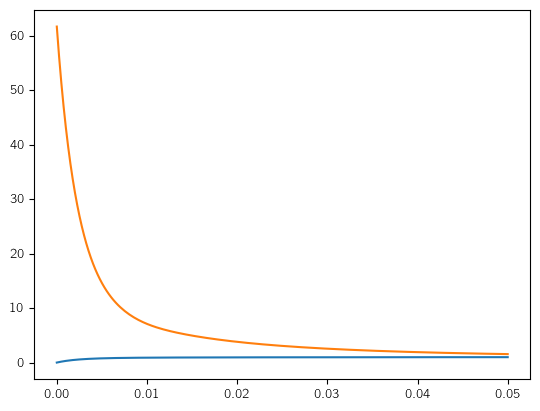

In [ ]:
non_amazon_nodes = np.array(list(set(range(num_nodes)) - set(amazon_nodes)))

plt.plot(t,np.mean(phi[non_amazon_nodes,:], axis=0))

plt.plot(t,np.mean(phi[amazon_nodes,:], axis=0))

In [ ]:
months = 300
offset = 365.25
density = 0.05

edge_dir = data_dir + 'edge_list-months='+str(months)+',offset='+str(offset)+',density={:}'.format(density)+'/'
graph_dir = data_dir + 'G-months='+str(months)+',offset='+str(offset)+',density={:}'.format(density)+'/'

total_networks = len(os.listdir(edge_dir))

num_nodes = 10242

with gzip.open(data_dir + 'year_intervals-months='+str(months)+',offset='+str(offset) + '.data', 'rb') as file:
  year_intervals = pkl.load(file)

with gzip.open(data_dir + 'date_intervals-months='+str(months)+',offset='+str(offset) + '.data', 'rb') as file:
  date_intervals = pkl.load(file)

dates = [year_intervals[i][0] + '-' + year_intervals[i][1] for i in range(len(year_intervals))]

import multiprocessing as mp

dir_end = '-months={:},offset={:},density={:}/'.format(months,offset,density)
if not os.path.isdir(data_dir + 'L'+dir_end):
  os.mkdir(data_dir + 'L'+dir_end)
if not os.path.isdir(data_dir + 'eigvals_A'+dir_end):
  os.mkdir(data_dir + 'eigvals_A'+dir_end)
if not os.path.isdir(data_dir + 'eigvecs_A'+dir_end):
  os.mkdir(data_dir + 'eigvecs_A'+dir_end)

parallel = True


if parallel:
  def handle_error(error):
      print(error)

  n_tasks = 4
  pool = mp.Pool(n_tasks)

  jobs = [pool.apply_async(make_laplace_data,
                          args=[j, dates[j], graph_dir, offset, months, density],
                          error_callback=handle_error) for j in range(total_networks)]
  pool.close()

  result_lst = []
  lst = tqdm(jobs)
  for job in lst:
      j = job.get()
      result_lst.append(j)
      try:
        lst.set_description(str(j))
      except:
        pass

  pool.join()
else:
  for j in trange(total_networks):
    make_laplace_data(j, dates[j], graph_dir, offset, months, density)

  0%|          | 0/51 [00:00<?, ?it/s]

In [ ]:
months = 300
offset = 365.25
density = 0.05

edge_dir = data_dir + 'edge_list-months='+str(months)+',offset='+str(offset)+',density={:}'.format(density)+'/'
graph_dir = data_dir + 'G-months='+str(months)+',offset='+str(offset)+',density={:}'.format(density)+'/'

dir_end = '-months={:},offset={:},density={:}/'.format(months,offset,density)
diff_dir = data_dir+'Diffusion'+dir_end
if not os.path.isdir(diff_dir):
  os.mkdir(diff_dir)
  os.mkdir(diff_dir + 'phi/')

total_networks = len(os.listdir(edge_dir))

num_nodes = 10242

with gzip.open(data_dir + 'year_intervals-months='+str(months)+',offset='+str(offset) + '.data', 'rb') as file:
  year_intervals = pkl.load(file)

with gzip.open(data_dir + 'date_intervals-months='+str(months)+',offset='+str(offset) + '.data', 'rb') as file:
  date_intervals = pkl.load(file)

dates = [year_intervals[i][0] + '-' + year_intervals[i][1] for i in range(len(year_intervals))]

with gzip.open(data_dir + 'icosahedral_grid.data', 'rb') as file:
    latlon_icos = np.array(pkl.load(file))

recompute = False

if recompute:
  amazon_nodes = []

  reader = shpreader.Reader(base_dir+'Amazon Biome/amazonia.shp')
  amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())

  for i in range(num_nodes):
    if amazon._geoms[0].contains(Point(latlon_icos[i,1]-360,latlon_icos[i,0])):
      amazon_nodes.append(i)

  with gzip.open(data_dir + 'amazon_nodes_new_networks.data', 'wb') as file:
    pkl.dump(amazon_nodes, file)
else:
  with gzip.open(data_dir + 'amazon_nodes_new_networks.data', 'rb') as file:
    amazon_nodes = pkl.load(file)

In [ ]:
def run_sim(G_index,G,diff_dir,date,amazon_nodes,t_end,t_steps,dir_end='/',disp_progress=False,read_data=True):
    """
    Run diffusion sim for a single network, then save pertinent variables and figures
    """
    # Correct ordering of node locations
    node_list = list(G.nodes())

    with gzip.open(data_dir + 'icosahedral_grid.data', 'rb') as file:
      latlon_icos = np.array(pkl.load(file))

    if read_data:
        # # Read L
        # with gzip.open(data_dir + 'L'+dir_end+str(G_index)+'.data','rb') as file:
        #   L = pkl.load(file)

        # Read eigvals
        with gzip.open(data_dir + 'eigvals'+dir_end+str(G_index)+'.data','rb') as file:
          eigvals = np.real(pkl.load(file))

        # Read eigvecs
        with gzip.open(data_dir + 'eigvecs'+dir_end+str(G_index)+'.data','rb') as file:
          eigvecs = np.real(pkl.load(file))
    else:
        # Get graph Laplacian and find its eigenvalues and eigenvectos
        L = nx.laplacian_matrix(G)
        L = sp.sparse.csr_matrix.toarray(L)
        eigvals, eigvecs = sp.linalg.eig(L)


    # Create an initial phi (phi_0) in which nodes in Amazon are given
    # a value of 1 and nodes not in the Amazon are given a value of 0
    N = G.number_of_nodes()
    phi_0 = np.zeros((N,1))
    for i in node_list:
        if i in amazon_nodes:
            phi_0[i] = N/(len(amazon_nodes))  # Approach 1 assymptotically
#             phi_0[i] = 1  # Approach 1 assymptotically


    # Run diffusion sim with time values requested by 't_end' and 't_steps'
    a_0 = np.linalg.solve(eigvecs,phi_0)
    t = np.linspace(0,t_end,t_steps)
    a = np.zeros((N,len(t)))
    if not disp_progress:
        lst = range(len(a))
    else:
        lst = trange(len(a),desc='Diff. Sim (1/2)',leave=False)
    for i in lst:
        a[i] = a_0[i]*np.exp(-eigvals[i]*t)
    phi = np.zeros((N,len(t)))
    if not disp_progress:
        lst = range(len(t))
    else:
        lst = trange(len(t),desc='Diff. Sim (2/2)',leave=False)
    for i in lst:
        phi_at_t = np.zeros((N,1))
        for j in range(N):
            v = a[j,i]*eigvecs[:,j].reshape((N,1))
            phi_at_t += v
        phi[:,i] = phi_at_t.reshape((1,N))


    with gzip.open(diff_dir + 'phi/' + date + '.data', 'wb') as file:
      pkl.dump(phi, file)

    return phi


def run_sims(diff_dir,dates,amazon_nodes,t_end=0.05,t_steps=200,dir_end='/',
             disp_progress=False,read_data=True):
    """
    Run all sims with given year range
    """
    phi_dict = {}
    for G_index in trange(len(dates),desc='Overall'):
        date = dates[G_index]
        with gzip.open(data_dir + 'G'+dir_end+date+'.data','rb') as file:
          G = pkl.load(file)

        phi = run_sim(G_index,G,diff_dir,date,amazon_nodes,t_end,t_steps,dir_end,disp_progress)
        phi_dict[date] = phi

    with gzip.open(diff_dir + 'phi_dict.data','wb') as file:
      pkl.dump(phi_dict,file)

    return phi_dict

In [ ]:
recompute = False

if recompute:
  phi_dict = run_sims(diff_dir,dates,amazon_nodes,dir_end=dir_end,disp_progress=True)
else:
  with gzip.open(diff_dir + 'phi_dict.data', 'rb') as file:
    phi_dict = pkl.load(file)

In [ ]:
non_amazon_nodes = np.array(list(set(range(num_nodes)) - set(amazon_nodes)))

average_phi_dict = {date:None for date in dates}
for date in dates:

  average_phi_dict[date] = np.mean(phi_dict[date][non_amazon_nodes,:],axis=0)

In [ ]:
num_nodes_affected_dict = {date:None for date in dates}
for date in dates:
  threshold = len(amazon_nodes)/num_nodes

  # num_nodes_affected = []
  # for i in range(200):
  #     num_nodes_affected.append(len(np.where(phi[:,i] >= threshold)[0])/len(non_amazon_nodes))
  #     # nodes = 0
  #     # for j in range(num_nodes):
  #     #     if j not in amazon_nodes:
  #     #         if phi[j,i] >= threshold:
  #     #             nodes += 1
  #     # num_nodes_affected += [nodes/(num_nodes - len(amazon_nodes))]

  # num_nodes_affected_dict[date] = num_nodes_affected
  num_nodes_affected_dict[date] = np.array([len(np.where(phi_dict[date][non_amazon_nodes,i] >= threshold)[0]) for i in range(200)])/len(non_amazon_nodes)

  # num_nodes_affected_dict[date] = np.array([len(np.where(phi_dict[date][non_amazon_nodes,i] >= np.mean(phi[non_amazon_nodes,i]))[0]) for i in range(200)])/len(non_amazon_nodes)

In [ ]:
diff_dist_dict = {date:None for date in dates}
for date in dates:
  phi = phi_dict[date]
  N = len(phi)
  len_t = phi.shape[1]
  diff_dist = np.zeros((N,len_t))
  for j in range(len_t):
    diff_dist[:,j] = np.mean(np.abs(phi[:,j].reshape((N,1))-phi[amazon_nodes,j]), axis=1)
  diff_dist_dict[date] = diff_dist

In [ ]:
t_target = 0.003
t = np.linspace(0,0.05,200)
i_ind = np.argmin(np.abs(t-t_target))

max_value = max([np.max(diff_dist_dict[date][:,i_ind]) for date in dates])

for date in dates:
  fontsize = 54

  plt.rc('text', usetex=True)
  plt.rc('xtick',labelsize=fontsize)
  plt.rc('ytick',labelsize=fontsize)


  # fig, axs = plt.subplots(1,1,sharex=True,figsize=(20,10))
  fig = plt.figure(figsize=(20,10))

  ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), projection=ccrs.Robinson(central_longitude=180))



  # plt.subplots_adjust(hspace=0, wspace=0.15)



  ### AXIS 1, RANDOM WALK MAP
  ax1.coastlines(zorder=5)


  # min_value = np.nanmin(idat)
  # max_value = np.nanmax(idat)
  # min_value = min(np.delete(dist_trend,amazon_nodes_corrected))
  # max_value = max(np.delete(dist_trend,amazon_nodes_corrected))
  # min_value = -.02#min(R_i_trend)
  # max_value = .02#max(R_i_trend)

  # idat1 = idat
  # idat1[np.where(idat < min_value)] = min_value

  min_value = 0
  # max_value = np.max(diff_dist_dict[date][:,i_ind])

  levels = np.linspace(min_value,max_value,100)
  ticks = [(levels[i]+levels[i+1])/2 for i in range(len(levels)-1)]

  # midpoint = -min_value/(max_value-min_value)
  cmap = mpl.cm.viridis
  # shifted_cmap = shiftedColorMap(cmap, midpoint=midpoint)


  reader = shpreader.Reader(base_dir+'/Amazon Biome/amazonia.shp')
  amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())
  ax1.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)

  im = ax1.scatter(latlon_icos[:,1], latlon_icos[:,0],
                    c=diff_dist_dict[date][:,i_ind],
                    cmap='viridis', transform=ccrs.PlateCarree(), marker='o', s=20,
                    edgecolors=None)
  im.set_clim(min_value, max_value)
  cbar=plt.colorbar(im, ax=ax1, orientation='horizontal',fraction=0.08, pad=0.02)
  # ticks = np.array([-5,-4,-3,-2,-1,0,1,2])
  # cbar.set_ticks(ticks*1e-5)
  # cbar.set_ticklabels(ticks)

  # cbar=plt.colorbar(im, ax=ax1, ticks=ticks[1::3], fraction=0.048, orientation='horizontal',
  #                   pad=0.02, boundaries=levels)
  # cbar.set_ticklabels(['{:.4f}'.format(tick) for tick in ticks[1::3]])

  # cbar.set_label('Slope of Trendline of Average Diffusion Distance to Amazon\n$t = $ '+
  #                '{:.4f}'.format(round(t_target, 4)),fontsize=fontsize)
  cbar.set_label(r'$m_k\left(R_i^{(k)}/N_A\right)$',fontsize=fontsize, usetex=True)

  # cbar.ax.plot([threshold_neg]*2, [0,1], 'k', lw=1)
  # cbar.ax.plot([threshold_pos]*2, [0,1], 'k', lw=1)

  plt.setp(ax1.spines.values(), linewidth=2)

  # plt.title(date, fontsize=fontsize)



  plt.tight_layout()



  title = 'Random Walk'
  # plt.savefig(fig_dir+title+'.jpg',bbox_inches='tight',pad_inches=0.2, dpi=300)
  # plt.savefig(fig_dir+title+'.pdf',bbox_inches='tight',pad_inches=0.2, dpi=300)

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
t = np.linspace(0,0.05,200)
diff_dist_trend = np.zeros((num_nodes,len(t)))

for i in range(len(t)):
  for node in range(num_nodes):
  #         slope, _ = np.polyfit(list(range(48)), [R_i_dict[date][node,1] for date in dates], 1)
      slope, _ = np.polyfit(list(range(len(dates))), [diff_dist_dict[date][node,i] for date in dates], 1)
      diff_dist_trend[node,i] = slope

In [ ]:
i_max_change = np.argmax(np.percentile(diff_dist_trend,0.75,axis=0)-np.percentile(diff_dist_trend,0.25,axis=0))
print(t[i_max_change])

0.0017587939698492463


In [ ]:
print(t)

[0.         0.00025126 0.00050251 0.00075377 0.00100503 0.00125628 0.00150754 0.00175879 0.00201005 0.00226131 0.00251256 0.00276382 0.00301508 0.00326633 0.00351759 0.00376884 0.0040201  0.00427136 0.00452261 0.00477387 0.00502513 0.00527638
 0.00552764 0.00577889 0.00603015 0.00628141 0.00653266 0.00678392 0.00703518 0.00728643 0.00753769 0.00778894 0.0080402  0.00829146 0.00854271 0.00879397 0.00904523 0.00929648 0.00954774 0.00979899 0.01005025 0.01030151 0.01055276 0.01080402
 0.01105528 0.01130653 0.01155779 0.01180905 0.0120603  0.01231156 0.01256281 0.01281407 0.01306533 0.01331658 0.01356784 0.0138191  0.01407035 0.01432161 0.01457286 0.01482412 0.01507538 0.01532663 0.01557789 0.01582915 0.0160804  0.01633166
 0.01658291 0.01683417 0.01708543 0.01733668 0.01758794 0.0178392  0.01809045 0.01834171 0.01859296 0.01884422 0.01909548 0.01934673 0.01959799 0.01984925 0.0201005  0.02035176 0.02060302 0.02085427 0.02110553 0.02135678 0.02160804 0.0218593
 0.02211055 0.02236181 0.0226

In [ ]:
fig_all_dir = fig_dir + 'All Time Values/'
if not os.path.isdir(fig_all_dir):
  os.mkdir(fig_all_dir)

for t_val in np.arange(0,0.03,0.00025):
  t = np.linspace(0,0.05,200)
  t_target = t_val
  i_ind = np.argmin(np.abs(t-t_target))


  ilat, ilon, idat = interpolate_scatter_data(latlon_icos, list(diff_dist_trend[:,i_ind]),
#                      shape_filename=base_dir+'/Amazon Biome/amazonia.shp',
                    method='linear', num_interp_pts=100, threshold_dateline=5, threshold_poles=15)


  fontsize = 36

  plt.rc('text', usetex=True)
  plt.rc('xtick',labelsize=fontsize)
  plt.rc('ytick',labelsize=fontsize)

  lw = 3

  fig, axs = plt.subplots(2,3,sharex=True,figsize=(40,10),gridspec_kw={'width_ratios':[1,0.05,1]})
  ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
  ax2 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), sharex=ax1)
  cax1 = plt.subplot2grid(shape=(2,3), loc=(0, 1), rowspan=2)
  ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=1, projection=ccrs.Robinson(central_longitude=180))
  cax2 = plt.subplot2grid(shape=(2,3), loc=(1, 2))

  n = len(dates)
  c = np.arange(1,n+1)
  norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
  cmap = mpl.cm.ScalarMappable(norm=norm, cmap='cividis')
  cmap.set_array([])
  for i in range(len(dates)):
      date = dates[i]
      ax1.plot(t,average_phi_dict[date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=5)

  plt.setp(ax1.get_xticklabels(), visible=False)

  # ax12.set_xlabel('$t$',fontsize=fontsize)
  ax1.set_ylabel(r'$\langle \phi(t) \rangle_{NA}$',fontsize=fontsize, labelpad=12)

  ax1.set_xlim([0, t[-1]])
  ax1.set_ylim([0, 1])
  # ax1.set_yticks([0.015, 0.016, 0.017, 0.018])

  ax1.plot([t_target, t_target], ax1.get_ylim(), '--', c='gray', lw=lw, zorder=4)

  spacing = 0.025
  ax1.annotate(r'\textbf{(a)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

  ax1.tick_params(length=15,width=3)
  plt.setp(ax1.spines.values(), linewidth=3, zorder=10)

  ### AXIS 2, NUMBER OF AFFECTED NODES
  ax2.tick_params(bottom=True, top=True, left=True, right=False)
  for i in range(len(dates)):
      date = dates[i]
      ax2.plot(t,num_nodes_affected_dict[date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=5)


  ax2.set_xlabel('$t$',fontsize=fontsize)
  # ax2.set_ylabel(r'$N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}/N_{NA}$',fontsize=fontsize,
  #                labelpad=10)
  # ax2.set_ylabel(r'$\sfrac{N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}}{N_{NA}}$',fontsize=fontsize+10,
  #                labelpad=10)
  ax2.set_ylabel(r'$\sfrac{N_{NA}^{(\phi(t) \geq \sfrac{N_A}{N})}}{N_{NA}}$',fontsize=fontsize+10,
                labelpad=10)

  # ax2.set_xlim([0,t[-1]])
  ax2.set_xlim([0,0.03])
  ax2.set_ylim([0,1])
  # ax2.set_yticks([0.2,0.4,0.6])

  ax2.plot([t_target, t_target], ax2.get_ylim(), '--', c='gray', lw=lw, zorder=4)
  ax1.annotate(r'$t = {:.5f}$'.format(t_target), color='k', xy=(t_target+0.0005, .05), xycoords='data',
  #              bbox=dict(facecolor='r',boxstyle='round',alpha=0.25),
              fontsize=fontsize,usetex=True, va='bottom', ha='left',zorder=6)

  # pos_ax1 = ax1.get_position()
  # pos_ax2 = ax2.get_position()
  # points_ax1 = pos_ax1.get_points()
  # points_ax2 = pos_ax2.get_points()

  # spacing = 0.005
  # # width = points_ax1[1][0] - points_ax1[0][0]
  # width = 0.4
  # points_ax1[0][0] = 0
  # points_ax1[1][0] = width
  # points_ax2[0][0] = 0
  # points_ax2[1][0] = width

  # pos_ax1.set_points(points_ax1)
  # pos_ax2.set_points(points_ax2)
  # ax1.set_position(pos_ax1)
  # ax2.set_position(pos_ax2)


  # pos_ax1 = ax1.get_position()
  # pos_cax1 = cax1.get_position()

  # points_ax1 = pos_ax1.get_points()
  # points_cax1 = pos_cax1.get_points()

  # spacing = 0.005
  # # width = points_cax1[1][0] - points_cax1[0][0]
  # width = 0.025
  # points_cax1[0][0] = points_ax1[1][0] + spacing
  # points_cax1[1][0] = points_cax1[0][0] + width

  # pos_cax1.set_points(points_cax1)

  # cax1.set_position(pos_cax1)

  spacing = 0.025
  ax2.annotate(r'\textbf{(b)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

  ax2.tick_params(length=15,width=3)
  plt.setp(ax2.spines.values(), linewidth=3, zorder=10)



  num_ticks = 5
  ticks = np.linspace(0,len(dates)-1,num_ticks).astype(int)

  # cax1 = fig.add_ax1es([0.68, 0.21, 0.01, 0.755])
  cbar1 = fig.colorbar(cmap, ticks=ticks,
                      cax=cax1, orientation='vertical', pad=-1, aspect=15, boundaries=np.arange(-.5,len(c),1))
  # cbar1.set_label(r'',fontsize=fontsize,rotation='vertical',labelpad=20)
  cbar1.ax.set_yticklabels([dates[tick] for tick in ticks])
  cbar1.ax.tick_params(length=15,width=3)
  cbar1.outline.set_linewidth(3)

  pos_ax1 = ax1.get_position()
  pos_ax2 = ax2.get_position()
  points_ax1 = pos_ax1.get_points()
  points_ax2 = pos_ax2.get_points()

  spacing = 0.005
  # width = points_ax1[1][0] - points_ax1[0][0]
  width = 0.4
  points_ax1[0][0] = 0
  points_ax1[1][0] = width
  points_ax2[0][0] = 0
  points_ax2[1][0] = width

  pos_ax1.set_points(points_ax1)
  pos_ax2.set_points(points_ax2)
  ax1.set_position(pos_ax1)
  ax2.set_position(pos_ax2)


  pos_ax1 = ax1.get_position()
  pos_cax1 = cax1.get_position()

  points_ax1 = pos_ax1.get_points()
  points_cax1 = pos_cax1.get_points()

  spacing = 0.005
  # width = points_cax1[1][0] - points_cax1[0][0]
  width = 0.025
  points_cax1[0][0] = points_ax1[1][0] + spacing
  points_cax1[1][0] = points_cax1[0][0] + width

  pos_cax1.set_points(points_cax1)

  cax1.set_position(pos_cax1)








  ax3.coastlines(zorder=5)


  # min_value = np.nanmin(idat)
  # max_value = np.nanmax(idat)
  # min_value = min(np.delete(dist_trend,amazon_nodes_corrected))
  # max_value = max(np.delete(dist_trend,amazon_nodes_corrected))
  # min_value = -.02#min(R_i_trend)
  # max_value = .02#max(R_i_trend)

  # idat1 = idat
  # idat1[np.where(idat < min_value)] = min_value

  max_value = max(abs(np.min(diff_dist_trend[:,i_ind])),np.max(diff_dist_trend[:,i_ind]))
  min_value = -max_value

  # min_value = np.min(diff_dist_trend[:,i_ind])
  # max_value = np.max(diff_dist_trend[:,i_ind])

  levels = np.linspace(min_value,max_value,100)
  ticks = [(levels[i]+levels[i+1])/2 for i in range(len(levels)-1)]

  # midpoint = -min_value/(max_value-min_value)
  cmap = mpl.cm.bwr
  # shifted_cmap = shiftedColorMap(cmap, midpoint=midpoint)


  reader = shpreader.Reader(base_dir+'/Amazon Biome/amazonia.shp')
  amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())
  ax3.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)

  plt.setp(ax3.spines.values(), linewidth=3, zorder=10)


  # im = ax3.scatter(latlon_icos[:,1], latlon_icos[:,0],
  #                   c=diff_dist_trend[:,i_ind],
  #                   cmap='bwr', transform=ccrs.PlateCarree(), marker='o', s=20,
  #                   edgecolors=None)
  im = ax3.contourf(ilon, ilat, idat, levels=levels,
                  cmap=cmap, alpha=1,
                  vmin=min_value, vmax=max_value,
                  transform=ccrs.PlateCarree(), zorder=4)
  for c in im.collections:
    c.set_edgecolor("face")
  im.set_clim(min_value, max_value)
  cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
  # ticks = np.array([-5,-4,-3,-2,-1,0,1,2])
  # cbar2.set_ticks(ticks*1e-5)
  # cbar2.set_ticklabels(ticks)

  # cbar2=plt.colorbar(im, ax=ax3, ticks=ticks[1::3], fraction=0.048, orientation='horizontal',
  #                   pad=0.02, boundaries=levels)
  # cbar2.set_ticklabels(['{:.4f}'.format(tick) for tick in ticks[1::3]])

  # cbar2.set_label('Slope of Trendline of Average Diffusion Distance to Amazon\n$t = $ '+
  #                '{:.4f}'.format(round(t_target, 4)),fontsize=fontsize)
  cbar2.set_label(r'$m_k\left(d_{i,A}^{(k)}('+r't={:.5f}'.format(t_target)+r')\right)$',fontsize=fontsize)
  cbar2.ax.tick_params(length=15,width=3)
  cbar2.outline.set_linewidth(3)
  tick_locator = mpl.ticker.MaxNLocator(nbins=5)
  cbar2.locator = tick_locator
  cbar2.update_ticks()
  # cbar2.ax.plot([threshold_neg]*2, [0,1], 'k', lw=1)
  # cbar2.ax.plot([threshold_pos]*2, [0,1], 'k', lw=1)

  plt.setp(ax3.spines.values(), linewidth=2)

  pos_ax3 = ax3.get_position()
  pos_cax1 = cax1.get_position()

  points_ax3 = pos_ax3.get_points()
  points_cax1 = pos_cax1.get_points()

  spacing = 0.075
  width = points_ax3[1][0] - points_ax3[0][0] + 0.15
  # width = 0.025
  points_ax3[0][0] = points_cax1[1][0] + spacing
  points_ax3[1][0] = points_ax3[0][0] + width
  points_ax3[0][1] = 0.2
  points_ax3[1][1] = .9

  pos_ax3.set_points(points_ax3)

  ax3.set_position(pos_ax3)


  pos_cax2 = cax2.get_position()

  points_cax2 = pos_cax2.get_points()

  spacing = 0.075
  scale = 0.05
  # width = points_ax3[1][0] - points_ax3[0][0] + 0.075
  # width = 0.025
  points_cax2[0][0] = points_cax1[1][0] + spacing + scale*width
  points_cax2[1][0] = points_ax3[0][0] + (1-scale)*width
  points_cax2[0][1] = 0.145
  points_cax2[1][1] = 0.21

  pos_cax2.set_points(points_cax2)

  cax2.set_position(pos_cax2)

  ax3.annotate(r'\textbf{(c)}', xy=(.0,.995), xycoords="axes fraction",
              fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)


  # plt.tight_layout()
  # plt.subplots_adjust(hspace=0.2)
  # fig.align_labels([ax1,ax2])




  # # plt.tight_layout()
  # plt.subplots_adjust(hspace=0)
  # # fig.align_labels([ax1,ax2])

  title = 't={:.5f},Avg Phi,Num Nodes Affected,Diff Dist'.format(t_target)
  plt.savefig(fig_all_dir+title+'.jpg',bbox_inches='tight',pad_inches=0.2, dpi=300)
  plt.savefig(fig_all_dir+title+'.pdf',bbox_inches='tight',pad_inches=0.2, dpi=300)

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-26-235e5de29f9a>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
<ipython-input-26-235e5de29f9a>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), sharex=ax1)
<ipython-input-26-235e5de29f9a>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  cax1 = plt.subplot2grid(shape=(2,3), loc=(0, 1), rowspan=2)
<ipython-input-26-235e5de29f9a>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as 

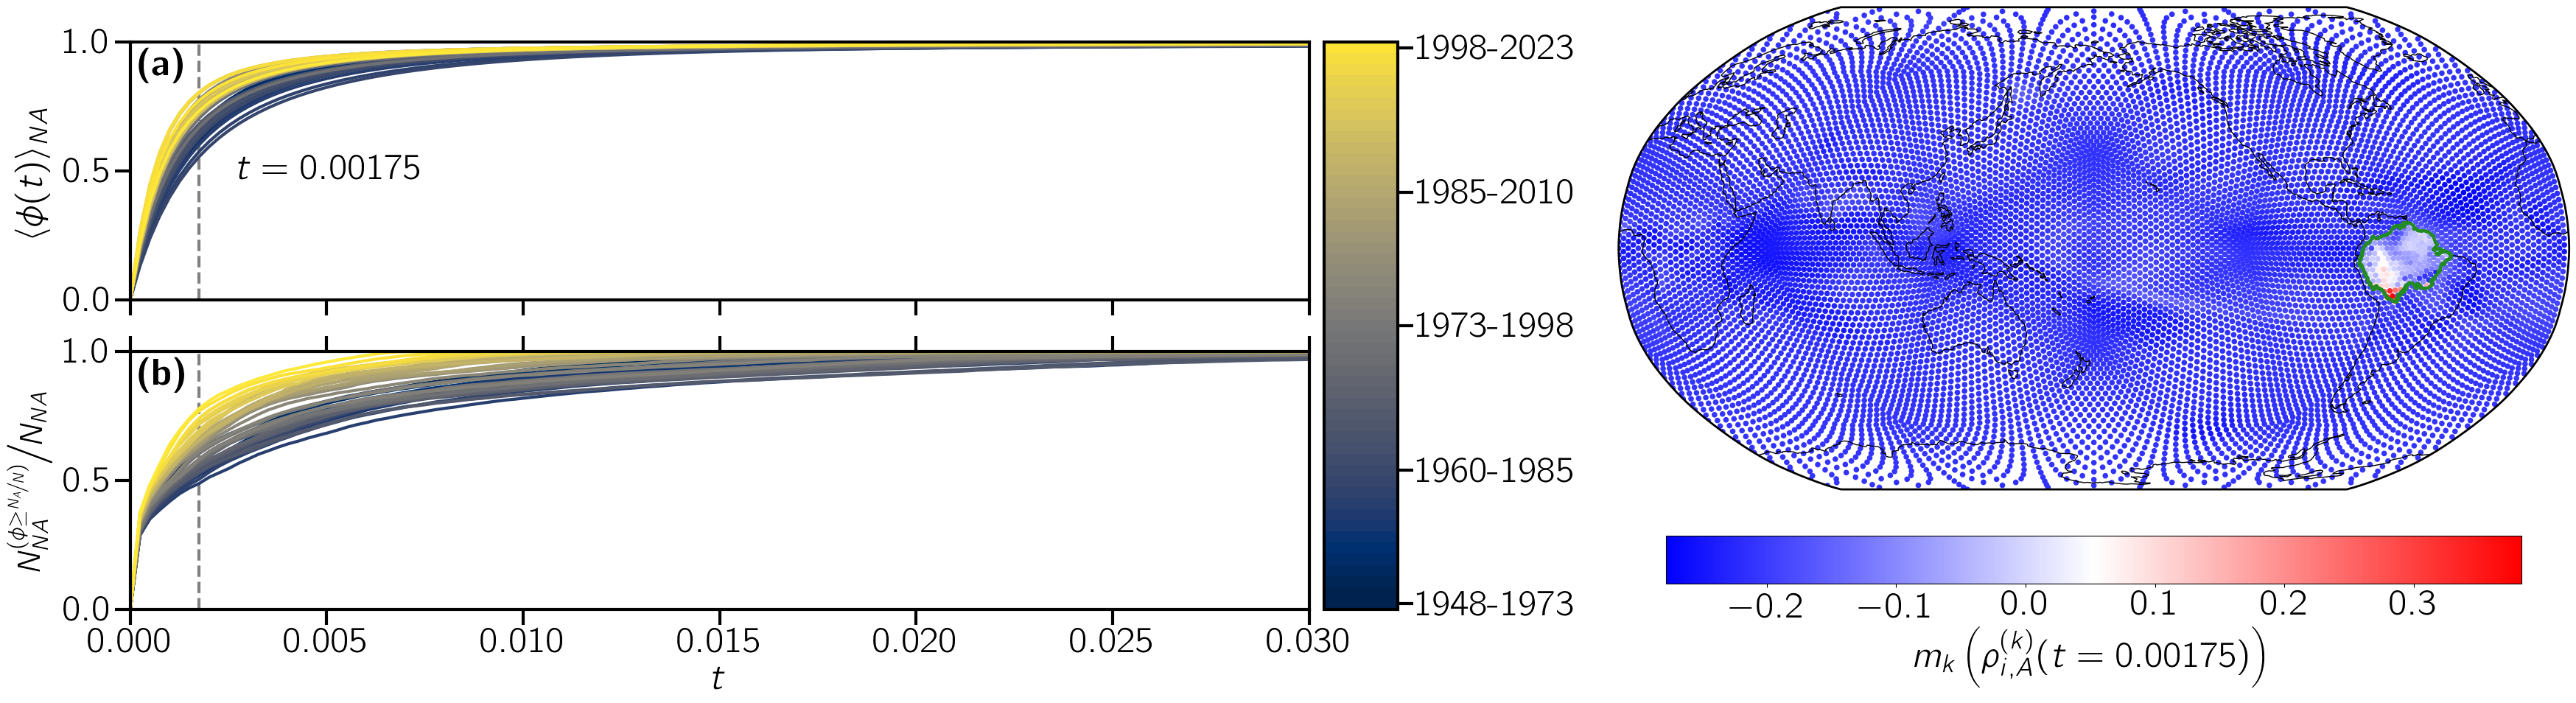

In [ ]:
t = np.linspace(0,0.05,200)
t_target = 0.00175
i_ind = np.argmin(np.abs(t-t_target))

fontsize = 36

plt.rc('text', usetex=True)
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)

lw = 3

fig, axs = plt.subplots(2,3,sharex=True,figsize=(40,10),gridspec_kw={'width_ratios':[1,0.05,1]})
ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), sharex=ax1)
cax1 = plt.subplot2grid(shape=(2,3), loc=(0, 1), rowspan=2)
ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=1, projection=ccrs.Robinson(central_longitude=180))
cax2 = plt.subplot2grid(shape=(2,3), loc=(1, 2))

n = len(dates)
c = np.arange(1,n+1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='cividis')
cmap.set_array([])
for i in range(len(dates)):
    date = dates[i]
    ax1.plot(t,average_phi_dict[date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=5)

plt.setp(ax1.get_xticklabels(), visible=False)

# ax12.set_xlabel('$t$',fontsize=fontsize)
ax1.set_ylabel(r'$\langle \phi(t) \rangle_{NA}$',fontsize=fontsize, labelpad=12)

ax1.set_xlim([0, t[-1]])
ax1.set_ylim([0, 1])
# ax1.set_yticks([0.015, 0.016, 0.017, 0.018])

ax1.plot([t_target, t_target], ax1.get_ylim(), '--', c='gray', lw=lw, zorder=4)

spacing = 0.025
ax1.annotate(r'\textbf{(a)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
             fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

ax1.tick_params(length=15,width=3)
plt.setp(ax1.spines.values(), linewidth=3, zorder=10)

### AXIS 2, NUMBER OF AFFECTED NODES
ax2.tick_params(bottom=True, top=True, left=True, right=False)
for i in range(len(dates)):
    date = dates[i]
    ax2.plot(t,num_nodes_affected_dict[date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=5)


ax2.set_xlabel('$t$',fontsize=fontsize)
# ax2.set_ylabel(r'$N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}/N_{NA}$',fontsize=fontsize,
#                labelpad=10)
# ax2.set_ylabel(r'$\sfrac{N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}}{N_{NA}}$',fontsize=fontsize+10,
#                labelpad=10)
ax2.set_ylabel(r'$\sfrac{N_{NA}^{(\phi \geq \sfrac{N_A}{N})}}{N_{NA}}$',fontsize=fontsize+10,
               labelpad=10)

# ax2.set_xlim([0,t[-1]])
ax2.set_xlim([0,0.03])
ax2.set_ylim([0,1])
# ax2.set_yticks([0.2,0.4,0.6])

ax2.plot([t_target, t_target], ax2.get_ylim(), '--', c='gray', lw=lw, zorder=4)
ax1.annotate(r'$t = '+str(t_target)+'$', color='k', xy=(t_target+0.001, .5), xycoords='data',
#              bbox=dict(facecolor='r',boxstyle='round',alpha=0.25),
             fontsize=fontsize,usetex=True, va='center', ha='left',zorder=6)

# pos_ax1 = ax1.get_position()
# pos_ax2 = ax2.get_position()
# points_ax1 = pos_ax1.get_points()
# points_ax2 = pos_ax2.get_points()

# spacing = 0.005
# # width = points_ax1[1][0] - points_ax1[0][0]
# width = 0.4
# points_ax1[0][0] = 0
# points_ax1[1][0] = width
# points_ax2[0][0] = 0
# points_ax2[1][0] = width

# pos_ax1.set_points(points_ax1)
# pos_ax2.set_points(points_ax2)
# ax1.set_position(pos_ax1)
# ax2.set_position(pos_ax2)


# pos_ax1 = ax1.get_position()
# pos_cax1 = cax1.get_position()

# points_ax1 = pos_ax1.get_points()
# points_cax1 = pos_cax1.get_points()

# spacing = 0.005
# # width = points_cax1[1][0] - points_cax1[0][0]
# width = 0.025
# points_cax1[0][0] = points_ax1[1][0] + spacing
# points_cax1[1][0] = points_cax1[0][0] + width

# pos_cax1.set_points(points_cax1)

# cax1.set_position(pos_cax1)

spacing = 0.025
ax2.annotate(r'\textbf{(b)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
             fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

ax2.tick_params(length=15,width=3)
plt.setp(ax2.spines.values(), linewidth=3, zorder=10)



num_ticks = 5
ticks = np.linspace(0,len(dates)-1,num_ticks).astype(int)

# cax1 = fig.add_ax1es([0.68, 0.21, 0.01, 0.755])
cbar1 = fig.colorbar(cmap, ticks=ticks,
                    cax=cax1, orientation='vertical', pad=-1, aspect=15, boundaries=np.arange(-.5,len(c),1))
# cbar1.set_label(r'',fontsize=fontsize,rotation='vertical',labelpad=20)
cbar1.ax.set_yticklabels([dates[tick] for tick in ticks])
cbar1.ax.tick_params(length=15,width=3)
cbar1.outline.set_linewidth(3)

pos_ax1 = ax1.get_position()
pos_ax2 = ax2.get_position()
points_ax1 = pos_ax1.get_points()
points_ax2 = pos_ax2.get_points()

spacing = 0.005
# width = points_ax1[1][0] - points_ax1[0][0]
width = 0.4
points_ax1[0][0] = 0
points_ax1[1][0] = width
points_ax2[0][0] = 0
points_ax2[1][0] = width

pos_ax1.set_points(points_ax1)
pos_ax2.set_points(points_ax2)
ax1.set_position(pos_ax1)
ax2.set_position(pos_ax2)


pos_ax1 = ax1.get_position()
pos_cax1 = cax1.get_position()

points_ax1 = pos_ax1.get_points()
points_cax1 = pos_cax1.get_points()

spacing = 0.005
# width = points_cax1[1][0] - points_cax1[0][0]
width = 0.025
points_cax1[0][0] = points_ax1[1][0] + spacing
points_cax1[1][0] = points_cax1[0][0] + width

pos_cax1.set_points(points_cax1)

cax1.set_position(pos_cax1)








ax3.coastlines(zorder=5)


# min_value = np.nanmin(idat)
# max_value = np.nanmax(idat)
# min_value = min(np.delete(dist_trend,amazon_nodes_corrected))
# max_value = max(np.delete(dist_trend,amazon_nodes_corrected))
# min_value = -.02#min(R_i_trend)
# max_value = .02#max(R_i_trend)

# idat1 = idat
# idat1[np.where(idat < min_value)] = min_value

min_value = np.min(diff_dist_trend[:,i_ind])
max_value = np.max(diff_dist_trend[:,i_ind])

levels = np.linspace(min_value,max_value,100)
ticks = [(levels[i]+levels[i+1])/2 for i in range(len(levels)-1)]

# midpoint = -min_value/(max_value-min_value)
cmap = mpl.cm.bwr
# shifted_cmap = shiftedColorMap(cmap, midpoint=midpoint)


reader = shpreader.Reader(base_dir+'/Amazon Biome/amazonia.shp')
amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())
ax3.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)

im = ax3.scatter(latlon_icos[:,1], latlon_icos[:,0],
                  c=diff_dist_trend[:,i_ind],
                  cmap='bwr', transform=ccrs.PlateCarree(), marker='o', s=20,
                  edgecolors=None)
im.set_clim(min_value, max_value)
cbar2=plt.colorbar(im, cax=cax2, orientation='horizontal',fraction=0.08, pad=0.02)
# ticks = np.array([-5,-4,-3,-2,-1,0,1,2])
# cbar2.set_ticks(ticks*1e-5)
# cbar2.set_ticklabels(ticks)

# cbar2=plt.colorbar(im, ax=ax3, ticks=ticks[1::3], fraction=0.048, orientation='horizontal',
#                   pad=0.02, boundaries=levels)
# cbar2.set_ticklabels(['{:.4f}'.format(tick) for tick in ticks[1::3]])

# cbar2.set_label('Slope of Trendline of Average Diffusion Distance to Amazon\n$t = $ '+
#                '{:.4f}'.format(round(t_target, 4)),fontsize=fontsize)
cbar2.set_label(r'$m_k\left(\rho_{i,A}^{(k)}('+r't={:}'.format(t_target)+r')\right)$',fontsize=fontsize)

# cbar2.ax.plot([threshold_neg]*2, [0,1], 'k', lw=1)
# cbar2.ax.plot([threshold_pos]*2, [0,1], 'k', lw=1)

plt.setp(ax3.spines.values(), linewidth=2)

pos_ax3 = ax3.get_position()
pos_cax1 = cax1.get_position()

points_ax3 = pos_ax3.get_points()
points_cax1 = pos_cax1.get_points()

spacing = 0.075
width = points_ax3[1][0] - points_ax3[0][0] + 0.15
# width = 0.025
points_ax3[0][0] = points_cax1[1][0] + spacing
points_ax3[1][0] = points_ax3[0][0] + width
points_ax3[0][1] = 0.2
points_ax3[1][1] = 1

pos_ax3.set_points(points_ax3)

ax3.set_position(pos_ax3)


pos_cax2 = cax2.get_position()

points_cax2 = pos_cax2.get_points()

spacing = 0.075
scale = 0.05
# width = points_ax3[1][0] - points_ax3[0][0] + 0.075
# width = 0.025
points_cax2[0][0] = points_cax1[1][0] + spacing + scale*width
points_cax2[1][0] = points_ax3[0][0] + (1-scale)*width
points_cax2[0][1] = 0.145
points_cax2[1][1] = 0.21

pos_cax2.set_points(points_cax2)

cax2.set_position(pos_cax2)


# plt.tight_layout()
# plt.subplots_adjust(hspace=0.2)
# fig.align_labels([ax1,ax2])




# # plt.tight_layout()
# plt.subplots_adjust(hspace=0)
# # fig.align_labels([ax1,ax2])

title = 'Avg Phi and Num Nodes Affected'
# plt.savefig(fig_dir+title+'.jpg',bbox_inches='tight',pad_inches=0.2, dpi=300)
# plt.savefig(fig_dir+title+'.pdf',bbox_inches='tight',pad_inches=0.2, dpi=300)

plt.show()

NameError: ignored

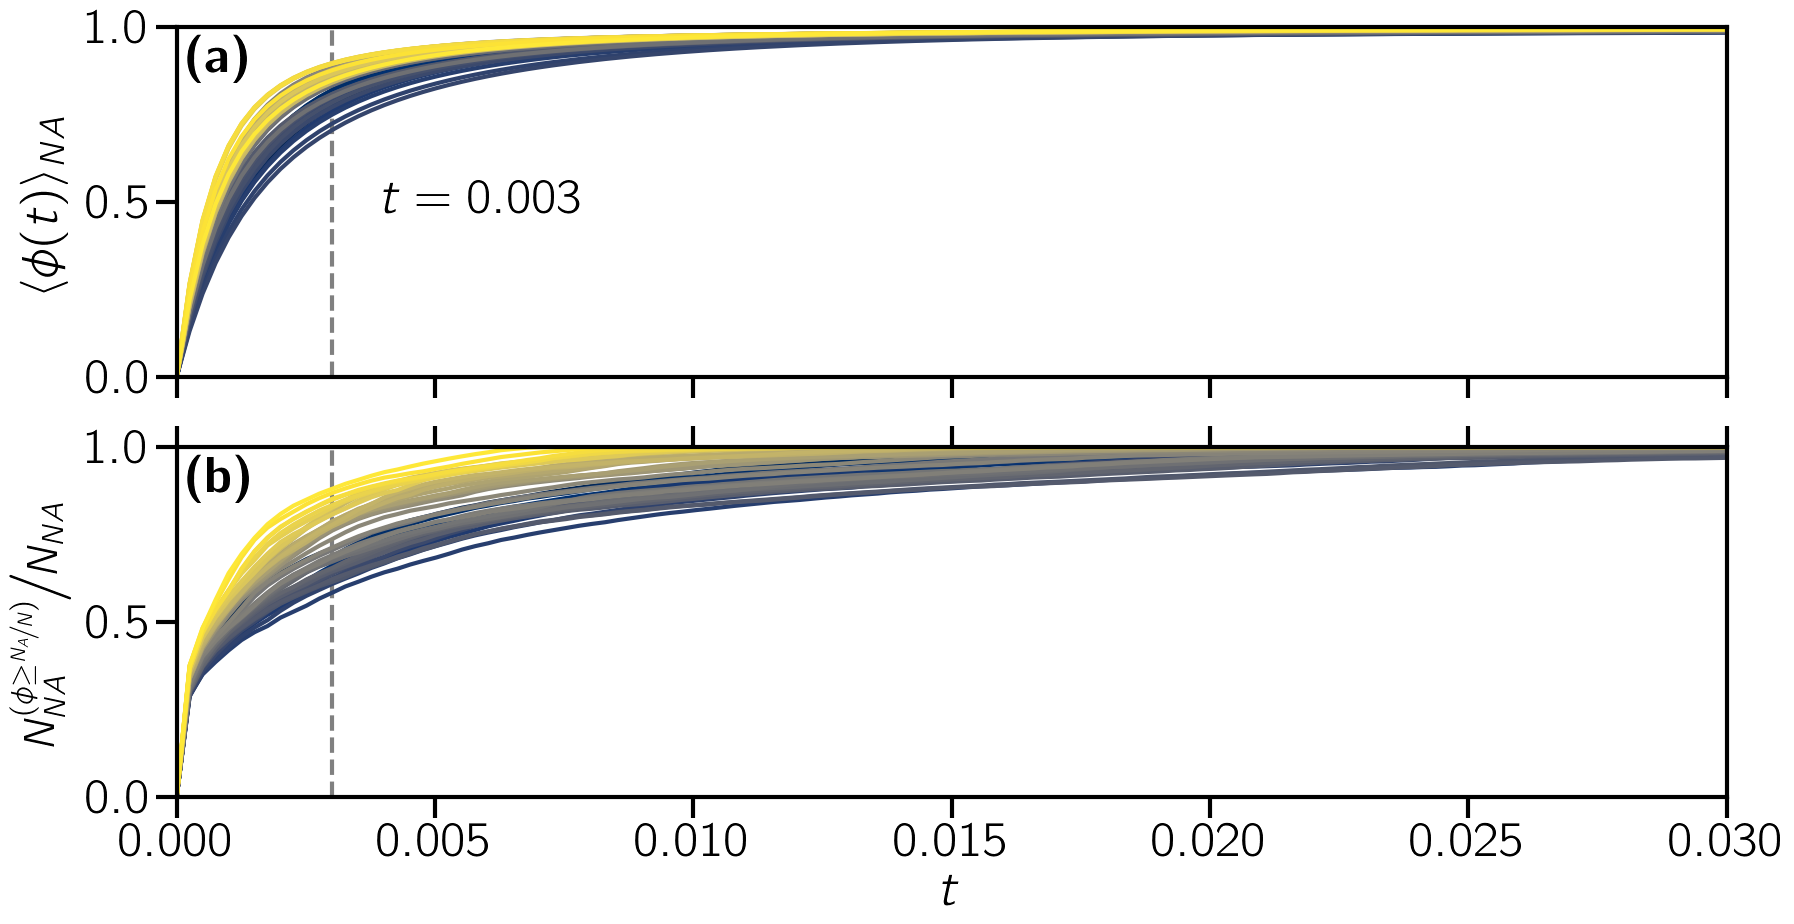

In [ ]:
t = np.linspace(0,0.05,200)
t_target = 0.003

fontsize = 36

plt.rc('text', usetex=True)
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)

lw = 3

fig, axs = plt.subplots(2,1,figsize=(20,10),sharex=True)
ax1, ax2 = axs

n = len(dates)
c = np.arange(1,n+1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='cividis')
cmap.set_array([])
for i in range(len(dates)):
    date = dates[i]
    ax1.plot(t,average_phi_dict[date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=5)

plt.setp(ax1.get_xticklabels(), visible=False)

# ax12.set_xlabel('$t$',fontsize=fontsize)
ax1.set_ylabel(r'$\langle \phi(t) \rangle_{NA}$',fontsize=fontsize, labelpad=12)

ax1.set_xlim([0, t[-1]])
ax1.set_ylim([0, 1])
# ax1.set_yticks([0.015, 0.016, 0.017, 0.018])

ax1.plot([t_target, t_target], ax1.get_ylim(), '--', c='gray', lw=lw, zorder=4)

spacing = 0.025
ax1.annotate(r'\textbf{(a)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
             fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

ax1.tick_params(length=15,width=3)
plt.setp(ax1.spines.values(), linewidth=3, zorder=10)

### AXIS 2, NUMBER OF AFFECTED NODES
ax2.tick_params(bottom=True, top=True, left=True, right=False)
for i in range(len(dates)):
    date = dates[i]
    ax2.plot(t,num_nodes_affected_dict[date],c=cmap.to_rgba(i+1),alpha=1,lw=lw,zorder=5)


ax2.set_xlabel('$t$',fontsize=fontsize)
# ax2.set_ylabel(r'$N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}/N_{NA}$',fontsize=fontsize,
#                labelpad=10)
# ax2.set_ylabel(r'$\sfrac{N_{NA}^{(\phi \geq \langle \phi \rangle_{NA})}}{N_{NA}}$',fontsize=fontsize+10,
#                labelpad=10)
ax2.set_ylabel(r'$\sfrac{N_{NA}^{(\phi \geq \sfrac{N_A}{N})}}{N_{NA}}$',fontsize=fontsize+10,
               labelpad=10)

# ax2.set_xlim([0,t[-1]])
ax2.set_xlim([0,0.03])
ax2.set_ylim([0,1])
# ax2.set_yticks([0.2,0.4,0.6])

ax2.plot([t_target, t_target], ax2.get_ylim(), '--', c='gray', lw=lw, zorder=4)
ax1.annotate(r'$t = '+str(t_target)+'$', color='k', xy=(t_target+0.001, .5), xycoords='data',
#              bbox=dict(facecolor='r',boxstyle='round',alpha=0.25),
             fontsize=fontsize,usetex=True, va='center', ha='left',zorder=6)

# pos_ax1 = ax1.get_position()
# pos_ax2 = ax2.get_position()
# points_ax1 = pos_ax1.get_points()
# points_ax2 = pos_ax2.get_points()

# spacing = 0.005
# # width = points_ax1[1][0] - points_ax1[0][0]
# width = 0.4
# points_ax1[0][0] = 0
# points_ax1[1][0] = width
# points_ax2[0][0] = 0
# points_ax2[1][0] = width

# pos_ax1.set_points(points_ax1)
# pos_ax2.set_points(points_ax2)
# ax1.set_position(pos_ax1)
# ax2.set_position(pos_ax2)


# pos_ax1 = ax1.get_position()
# pos_cax1 = cax1.get_position()

# points_ax1 = pos_ax1.get_points()
# points_cax1 = pos_cax1.get_points()

# spacing = 0.005
# # width = points_cax1[1][0] - points_cax1[0][0]
# width = 0.025
# points_cax1[0][0] = points_ax1[1][0] + spacing
# points_cax1[1][0] = points_cax1[0][0] + width

# pos_cax1.set_points(points_cax1)

# cax1.set_position(pos_cax1)

spacing = 0.025
ax2.annotate(r'\textbf{(b)}', xy=(spacing/4, 1-spacing), xycoords="axes fraction",
             fontsize=fontsize,usetex=True, va='top', ha='left', zorder=100)

ax2.tick_params(length=15,width=3)
plt.setp(ax2.spines.values(), linewidth=3, zorder=10)

num_ticks = 5
ticks = np.linspace(0,len(dates)-1,num_ticks).astype(int)

# plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
# fig.align_labels([ax1,ax2])

# cax1 = fig.add_ax1es([0.68, 0.21, 0.01, 0.755])
cbar = fig.colorbar(cmap, ticks=ticks,
                    ax=[ax1,ax2], orientation='vertical', pad=.02, aspect=15, boundaries=np.arange(-.5,len(c),1))
# cbar.set_label(r'',fontsize=fontsize,rotation='vertical',labelpad=20)
cbar.ax.set_yticklabels([dates[tick] for tick in ticks])
cbar.ax.tick_params(length=15,width=3)
cbar.outline.set_linewidth(3)



# # plt.tight_layout()
# plt.subplots_adjust(hspace=0)
# # fig.align_labels([ax1,ax2])

title = 'Avg Phi and Num Nodes Affected'
plt.savefig(fig_dir+title+'.jpg',bbox_inches='tight',pad_inches=0.2, dpi=300)
plt.savefig(fig_dir+title+'.pdf',bbox_inches='tight',pad_inches=0.2, dpi=300)

plt.show()

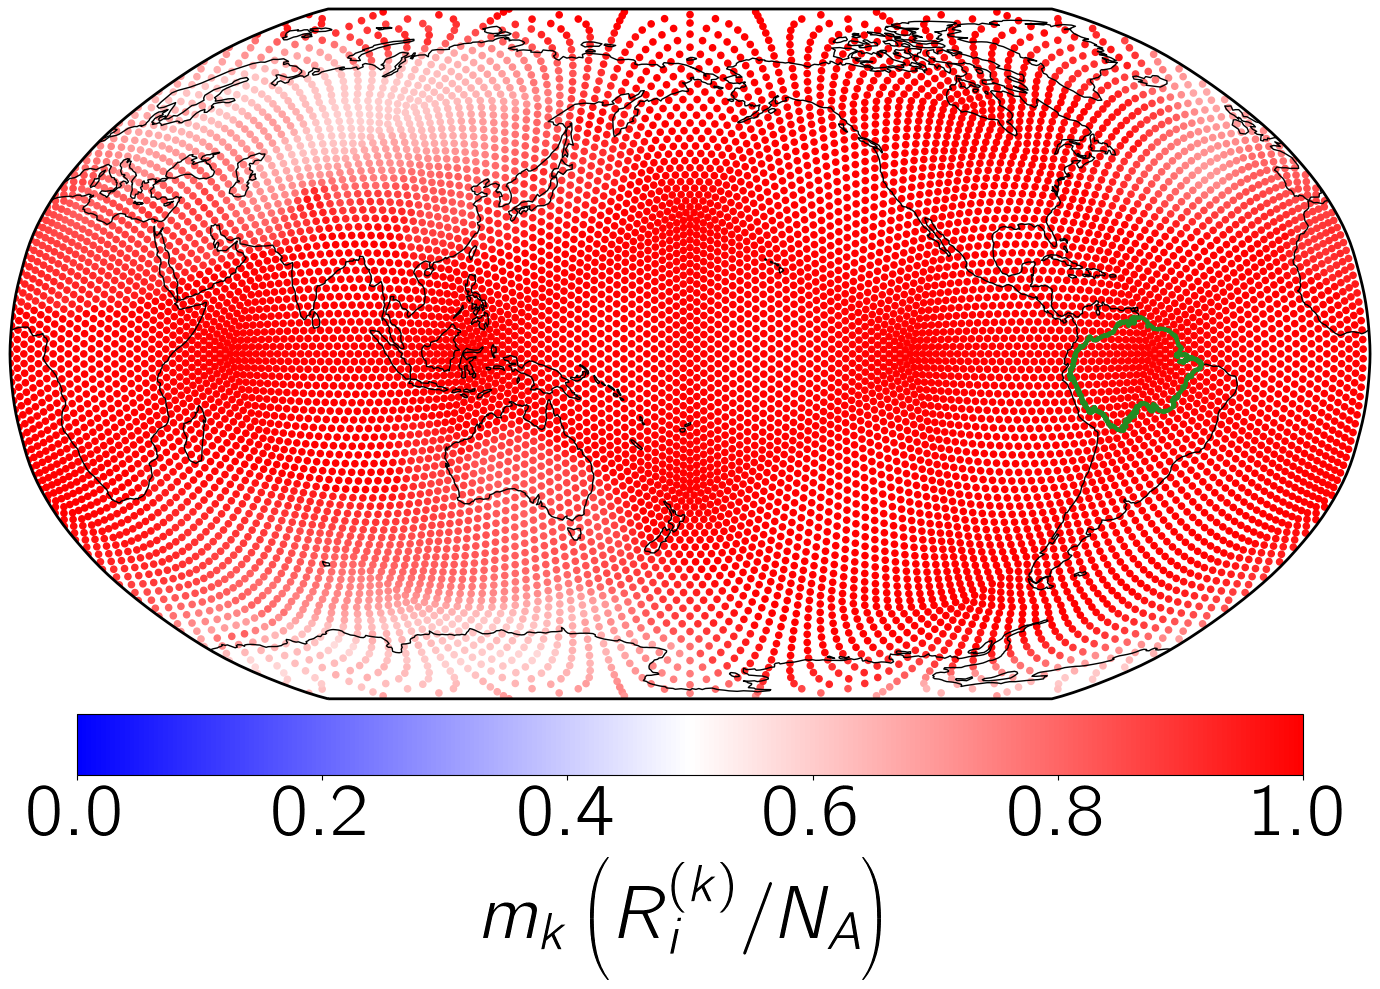

In [ ]:
i = 199

fontsize = 54

plt.rc('text', usetex=True)
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)


# fig, axs = plt.subplots(1,1,sharex=True,figsize=(20,10))
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), projection=ccrs.Robinson(central_longitude=180))



# plt.subplots_adjust(hspace=0, wspace=0.15)



### AXIS 1, RANDOM WALK MAP
ax1.coastlines(zorder=5)


# min_value = np.nanmin(idat)
# max_value = np.nanmax(idat)
# min_value = min(np.delete(dist_trend,amazon_nodes_corrected))
# max_value = max(np.delete(dist_trend,amazon_nodes_corrected))
# min_value = -.02#min(R_i_trend)
# max_value = .02#max(R_i_trend)

# idat1 = idat
# idat1[np.where(idat < min_value)] = min_value

min_value = 0
max_value = 1

levels = np.linspace(min_value,max_value,100)
ticks = [(levels[i]+levels[i+1])/2 for i in range(len(levels)-1)]

# midpoint = -min_value/(max_value-min_value)
cmap = mpl.cm.bwr
# shifted_cmap = shiftedColorMap(cmap, midpoint=midpoint)


reader = shpreader.Reader(base_dir+'/Amazon Biome/amazonia.shp')
amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())
ax1.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)

im = ax1.scatter(latlon_icos[:,1], latlon_icos[:,0],
                  c=phi[:,i],
                  cmap='bwr', transform=ccrs.PlateCarree(), marker='o', s=20,
                  edgecolors=None)
im.set_clim(min_value, max_value)
cbar=plt.colorbar(im, ax=ax1, orientation='horizontal',fraction=0.08, pad=0.02)
# ticks = np.array([-5,-4,-3,-2,-1,0,1,2])
# cbar.set_ticks(ticks*1e-5)
# cbar.set_ticklabels(ticks)

# cbar=plt.colorbar(im, ax=ax1, ticks=ticks[1::3], fraction=0.048, orientation='horizontal',
#                   pad=0.02, boundaries=levels)
# cbar.set_ticklabels(['{:.4f}'.format(tick) for tick in ticks[1::3]])

# cbar.set_label('Slope of Trendline of Average Diffusion Distance to Amazon\n$t = $ '+
#                '{:.4f}'.format(round(t_target, 4)),fontsize=fontsize)
cbar.set_label(r'$m_k\left(R_i^{(k)}/N_A\right)$',fontsize=fontsize, usetex=True)

# cbar.ax.plot([threshold_neg]*2, [0,1], 'k', lw=1)
# cbar.ax.plot([threshold_pos]*2, [0,1], 'k', lw=1)

plt.setp(ax1.spines.values(), linewidth=2)

# plt.title(date, fontsize=fontsize)



plt.tight_layout()



title = 'Random Walk'
# plt.savefig(fig_dir+title+'.jpg',bbox_inches='tight',pad_inches=0.2, dpi=300)
# plt.savefig(fig_dir+title+'.pdf',bbox_inches='tight',pad_inches=0.2, dpi=300)

plt.show()

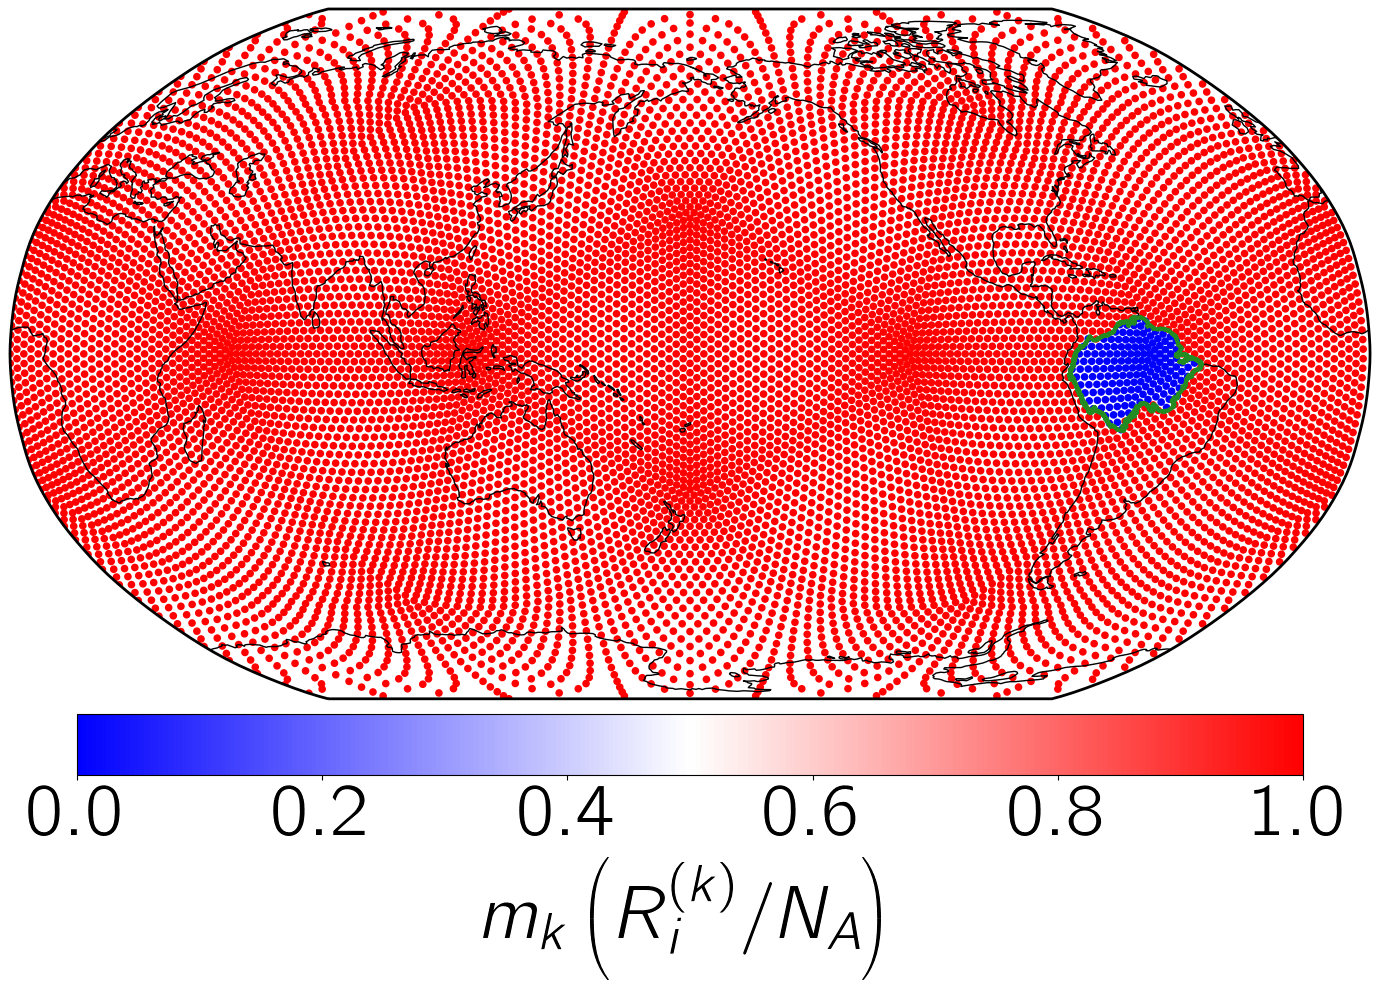

In [ ]:
i = 100

fontsize = 54

plt.rc('text', usetex=True)
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)


# fig, axs = plt.subplots(1,1,sharex=True,figsize=(20,10))
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), projection=ccrs.Robinson(central_longitude=180))



# plt.subplots_adjust(hspace=0, wspace=0.15)



### AXIS 1, RANDOM WALK MAP
ax1.coastlines(zorder=5)


# min_value = np.nanmin(idat)
# max_value = np.nanmax(idat)
# min_value = min(np.delete(dist_trend,amazon_nodes_corrected))
# max_value = max(np.delete(dist_trend,amazon_nodes_corrected))
# min_value = -.02#min(R_i_trend)
# max_value = .02#max(R_i_trend)

# idat1 = idat
# idat1[np.where(idat < min_value)] = min_value

min_value = 0
max_value = 1

levels = np.linspace(min_value,max_value,100)
ticks = [(levels[i]+levels[i+1])/2 for i in range(len(levels)-1)]

# midpoint = -min_value/(max_value-min_value)
cmap = mpl.cm.bwr
# shifted_cmap = shiftedColorMap(cmap, midpoint=midpoint)


reader = shpreader.Reader(base_dir+'/Amazon Biome/amazonia.shp')
amazon = cartopy.feature.ShapelyFeature(list(reader.geometries()), ccrs.PlateCarree())
ax1.add_feature(amazon, facecolor='none', edgecolor='forestgreen', alpha=1, linewidth=3, zorder=6)

im = ax1.scatter(latlon_icos[:,1], latlon_icos[:,0],
                  c=[1 if i in non_amazon_nodes else 0 for i in range(num_nodes)],
                  cmap='bwr', transform=ccrs.PlateCarree(), marker='o', s=20,
                  edgecolors=None)
im.set_clim(min_value, max_value)
cbar=plt.colorbar(im, ax=ax1, orientation='horizontal',fraction=0.08, pad=0.02)
# ticks = np.array([-5,-4,-3,-2,-1,0,1,2])
# cbar.set_ticks(ticks*1e-5)
# cbar.set_ticklabels(ticks)

# cbar=plt.colorbar(im, ax=ax1, ticks=ticks[1::3], fraction=0.048, orientation='horizontal',
#                   pad=0.02, boundaries=levels)
# cbar.set_ticklabels(['{:.4f}'.format(tick) for tick in ticks[1::3]])

# cbar.set_label('Slope of Trendline of Average Diffusion Distance to Amazon\n$t = $ '+
#                '{:.4f}'.format(round(t_target, 4)),fontsize=fontsize)
cbar.set_label(r'$m_k\left(R_i^{(k)}/N_A\right)$',fontsize=fontsize, usetex=True)

# cbar.ax.plot([threshold_neg]*2, [0,1], 'k', lw=1)
# cbar.ax.plot([threshold_pos]*2, [0,1], 'k', lw=1)

plt.setp(ax1.spines.values(), linewidth=2)

# plt.title(date, fontsize=fontsize)



plt.tight_layout()



title = 'Random Walk'
# plt.savefig(fig_dir+title+'.jpg',bbox_inches='tight',pad_inches=0.2, dpi=300)
# plt.savefig(fig_dir+title+'.pdf',bbox_inches='tight',pad_inches=0.2, dpi=300)

plt.show()